## *Base de Dados*

In [1]:
# importando as bibliotecas que serão utilizadas neste projeto;

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importando a base de dados retirada do site Kaggle;

df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
# Visualizando as primeiras linhas da base de dados;

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## *Dicionário de Dados*

### Variavéis 

**Suburb**: Bairro

**Address**: Endereço

**Rooms**: Número de quartos

**Price**: Preço em dólares australianos

**Método**:
S - propriedade vendida;
SP - imóvel vendido anteriormente;
PI - imóvel repassado;
PN - vendido antes não divulgado;
SN - vendido não divulgado;
NB - sem licitação;
VB - lance do fornecedor;
W - retirado antes do leilão;
SA - vendidos após leilão;
SS - vendido após preço de leilão não divulgado.
N/A - preço ou lance mais alto não disponível.

Tipo :
br - quarto(s);
h - casa,chalé,vila,semi,terraço;
u - unidade, duplex;
t - moradia;
site dev - site de desenvolvimento;
o res - outros residenciais.

SellerG: Agente Imobiliário

Date: Data de venda

Distance: Distância do CBD em quilômetros

Regionname: Região geral (Oeste, Noroeste, Norte, Nordeste, etc.)

Propertycount: Número de propriedades que existem no subúrbio.

Bedroom2 : número de quartos raspado (de fonte diferente)

Bathroom: número de banheiros

Car: número de vagas

Landsize: Tamanho do terreno em metros

BuildingArea: Tamanho do edifício em metros

YearBuilt: Ano em que a casa foi construída

CouncilArea: Conselho de Administração da área

Lattitude

Longtitude



## *Análise Exploratória de Dados*

In [4]:
# Analisando o tamanho da base;

df.shape

(34857, 21)

In [5]:
# Visualizando as informações sobre os dados;

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

### O dataset possui 21 colunas de características e 34.857 registros observados;

In [6]:
# Traduzindo o nome das colunas para português. 
# Criando uma variavél para armazenar um dicicionário;

colunas_traduzidas = {
    'Suburb': 'Suburbio',
    'Address': 'Endereco',
    'Rooms': 'Quartos',
    'Type': 'Tipo',
    'Price': 'Preco',
    'Method': 'Metodo',
    'SellerG': 'Vendedor',
    'Date': 'Data',
    'Distance': 'Distancia',
    'Postcode': 'Codigo_Postal',
    'Bedroom2': 'Quarto_Raspagem',
    'Bathroom': 'Banheiro',
    'Car': 'Carro',
    'Landsize': 'Tamanho_do_Terreno',
    'BuildingArea': 'Area_Construida',
    'YearBuilt': 'Ano_de_Construcao',
    'CouncilArea': 'Area_do_Conselho',
    'Lattitude': 'Latitude',
    'Longtitude': 'Longitude',
    'Regionname':  'Nome_da_Regiao',
    'Propertycount': 'Contagem_de_Propriedades',
}

In [7]:
# Renomeando as colunas através do método rename que aceita o dicionário;

df = df.rename(columns = colunas_traduzidas)
df.columns

Index(['Suburbio', 'Endereco', 'Quartos', 'Tipo', 'Preco', 'Metodo',
       'Vendedor', 'Data', 'Distancia', 'Codigo_Postal', 'Quarto_Raspagem',
       'Banheiro', 'Carro', 'Tamanho_do_Terreno', 'Area_Construida',
       'Ano_de_Construcao', 'Area_do_Conselho', 'Latitude', 'Longitude',
       'Nome_da_Regiao', 'Contagem_de_Propriedades'],
      dtype='object')

### Tratamento de dados faltantes

In [8]:
# Verificando a quantidade de registros faltantes;

df.isnull().sum()

Suburbio                        0
Endereco                        0
Quartos                         0
Tipo                            0
Preco                        7610
Metodo                          0
Vendedor                        0
Data                            0
Distancia                       1
Codigo_Postal                   1
Quarto_Raspagem              8217
Banheiro                     8226
Carro                        8728
Tamanho_do_Terreno          11810
Area_Construida             21115
Ano_de_Construcao           19306
Area_do_Conselho                3
Latitude                     7976
Longitude                    7976
Nome_da_Regiao                  3
Contagem_de_Propriedades        3
dtype: int64

In [9]:
# Verificando a quantidade de valores infinitos em cada coluna numérica

df_numeric = df.select_dtypes(include=[np.number])
inf_counts = np.isinf(df_numeric).sum()
print(inf_counts)

Quartos                     0
Preco                       0
Distancia                   0
Codigo_Postal               0
Quarto_Raspagem             0
Banheiro                    0
Carro                       0
Tamanho_do_Terreno          0
Area_Construida             0
Ano_de_Construcao           0
Latitude                    0
Longitude                   0
Contagem_de_Propriedades    0
dtype: int64


### Analisando a célula acima é possível verificar a existência de **dados faltantes** nas colunas.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Suburbio                  34857 non-null  object 
 1   Endereco                  34857 non-null  object 
 2   Quartos                   34857 non-null  int64  
 3   Tipo                      34857 non-null  object 
 4   Preco                     27247 non-null  float64
 5   Metodo                    34857 non-null  object 
 6   Vendedor                  34857 non-null  object 
 7   Data                      34857 non-null  object 
 8   Distancia                 34856 non-null  float64
 9   Codigo_Postal             34856 non-null  float64
 10  Quarto_Raspagem           26640 non-null  float64
 11  Banheiro                  26631 non-null  float64
 12  Carro                     26129 non-null  float64
 13  Tamanho_do_Terreno        23047 non-null  float64
 14  Area_C

In [11]:
# Criando uma variável que armazena um array;
colunas_sem_registro = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        colunas_sem_registro.append(col)

In [12]:
# Analisando a lista criada;

colunas_sem_registro

['Preco',
 'Distancia',
 'Codigo_Postal',
 'Quarto_Raspagem',
 'Banheiro',
 'Carro',
 'Tamanho_do_Terreno',
 'Area_Construida',
 'Ano_de_Construcao',
 'Area_do_Conselho',
 'Latitude',
 'Longitude',
 'Nome_da_Regiao',
 'Contagem_de_Propriedades']

In [13]:
df[colunas_sem_registro].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preco                     27247 non-null  float64
 1   Distancia                 34856 non-null  float64
 2   Codigo_Postal             34856 non-null  float64
 3   Quarto_Raspagem           26640 non-null  float64
 4   Banheiro                  26631 non-null  float64
 5   Carro                     26129 non-null  float64
 6   Tamanho_do_Terreno        23047 non-null  float64
 7   Area_Construida           13742 non-null  float64
 8   Ano_de_Construcao         15551 non-null  float64
 9   Area_do_Conselho          34854 non-null  object 
 10  Latitude                  26881 non-null  float64
 11  Longitude                 26881 non-null  float64
 12  Nome_da_Regiao            34854 non-null  object 
 13  Contagem_de_Propriedades  34854 non-null  float64
dtypes: flo

#### Para as variáveis numéricas, iremos plotar os gráficos de distribuição de cada uma;

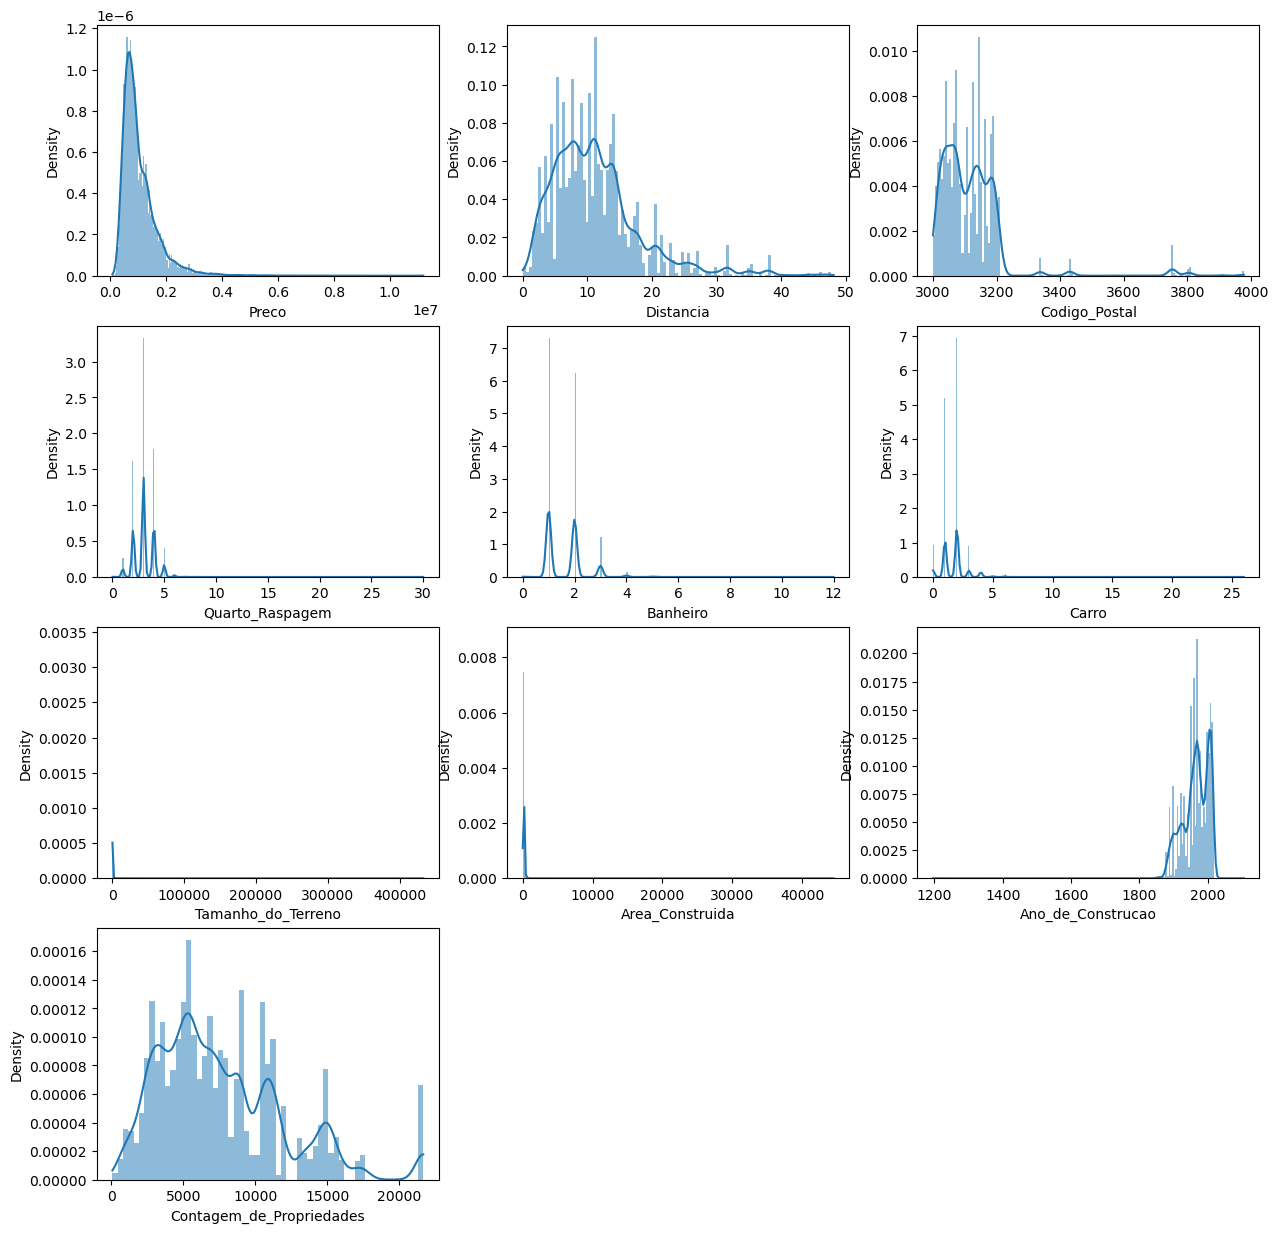

In [14]:
features_numericas = ['Preco', 'Distancia', 'Codigo_Postal', 'Quarto_Raspagem','Banheiro', 'Carro', 'Tamanho_do_Terreno', 'Area_Construida', 'Ano_de_Construcao','Contagem_de_Propriedades']
    
fig = plt.figure(figsize=(15, 15))

for column in features_numericas:
  ax = fig.add_subplot(4, 3, features_numericas.index(column)+1)
  sns.histplot(df, x = column, kde=True, stat="density", linewidth=0) 


### Analisando os gráficos acima, podemos observar que as features não são simétricas. Neste caso, iremos preencher os dados faltantes com as suas respectivas medianas, ou seja o valor que ocupa a posição central dos dados.

In [15]:
# inserindo dados faltantes das colunas numéricas com as suas medianas;

for numericas in features_numericas:
    df[numericas].fillna(df[numericas].median(), inplace = True)

In [16]:
df[colunas_sem_registro].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preco                     34857 non-null  float64
 1   Distancia                 34857 non-null  float64
 2   Codigo_Postal             34857 non-null  float64
 3   Quarto_Raspagem           34857 non-null  float64
 4   Banheiro                  34857 non-null  float64
 5   Carro                     34857 non-null  float64
 6   Tamanho_do_Terreno        34857 non-null  float64
 7   Area_Construida           34857 non-null  float64
 8   Ano_de_Construcao         34857 non-null  float64
 9   Area_do_Conselho          34854 non-null  object 
 10  Latitude                  26881 non-null  float64
 11  Longitude                 26881 non-null  float64
 12  Nome_da_Regiao            34854 non-null  object 
 13  Contagem_de_Propriedades  34857 non-null  float64
dtypes: flo

In [17]:
# Transformando a váriável Preco float64 em int64 para melhor manipulação a seguir.

df['Preco'] = df['Preco'].astype('int64')

In [18]:
df['Preco'].head()

0     870000
1    1480000
2    1035000
3     870000
4    1465000
Name: Preco, dtype: int64

/tmp/ipykernel_10924/2155503912.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=6)
/tmp/ipykernel_10924/2155503912.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=6)


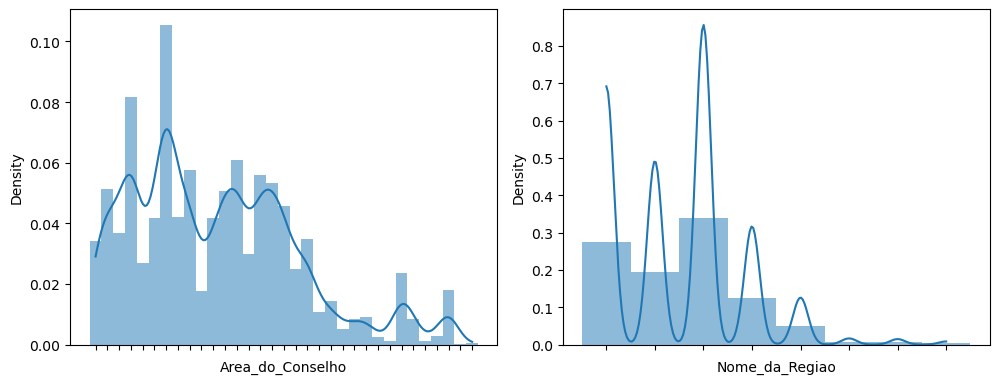

In [19]:
# Gerando gráficos das variáveis do tipo object;

features_objects = ['Area_do_Conselho', 'Nome_da_Regiao']

fig = plt.figure(figsize=(15, 15))

for column in features_objects:
    ax = fig.add_subplot(4, 3, features_objects.index(column)+1)
    sns.histplot(df, x = column, kde=True, stat="density", linewidth=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=6) 
    plt.tight_layout(pad=1.0) 

plt.show()

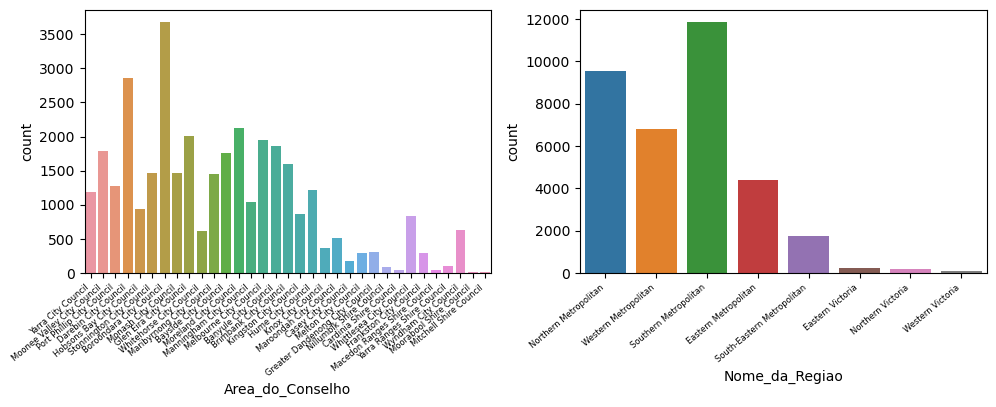

In [20]:
features_objects = ['Area_do_Conselho', 'Nome_da_Regiao']

fig = plt.figure(figsize=(15,15))

for column in features_objects:
    ax = fig.add_subplot(4, 3, features_objects.index(column)+1)
    sns.countplot(data = df, x = column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=6) 
    plt.tight_layout()

plt.show()

### No caso acima iremos preencher os dados faltantes com as respectivas modas, pois é uma maneira simples de preencher o registro com o valor(es) mais prováveis no dataset.

In [21]:
# Adicionando os dados faltantes das features objects com a medida de moda; 

for objects in features_objects:
    df[objects].fillna(df[objects].mode()[0], inplace = True)

In [22]:
# Verificando o preenchimento das features;

df[colunas_sem_registro].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Preco                     34857 non-null  int64  
 1   Distancia                 34857 non-null  float64
 2   Codigo_Postal             34857 non-null  float64
 3   Quarto_Raspagem           34857 non-null  float64
 4   Banheiro                  34857 non-null  float64
 5   Carro                     34857 non-null  float64
 6   Tamanho_do_Terreno        34857 non-null  float64
 7   Area_Construida           34857 non-null  float64
 8   Ano_de_Construcao         34857 non-null  float64
 9   Area_do_Conselho          34857 non-null  object 
 10  Latitude                  26881 non-null  float64
 11  Longitude                 26881 non-null  float64
 12  Nome_da_Regiao            34857 non-null  object 
 13  Contagem_de_Propriedades  34857 non-null  float64
dtypes: flo

In [23]:
# Certificando quantas features ainda tem valores vazios;

colunas_sem_registro = []

for col in df.columns:
    if df[col].isnull().sum() > 0:
        colunas_sem_registro.append(col)

### Em realção as features latitude longitude poderíamos preencher os dados faltantes com a moda. No entando no caso de localização geográficas estariamos adicionando um vies para a base, logo que pode ter mais de uma moda também. Dessa forma, achamos mais prudente permanecer com a feature como está, uma vez que temos mais de 77% de dados na variável!

## *Investigando a variável de interesse (Preco)*

In [24]:
# Informação da feature Preco

df['Preco']

0         870000
1        1480000
2        1035000
3         870000
4        1465000
          ...   
34852    1480000
34853     888000
34854     705000
34855    1140000
34856    1020000
Name: Preco, Length: 34857, dtype: int64

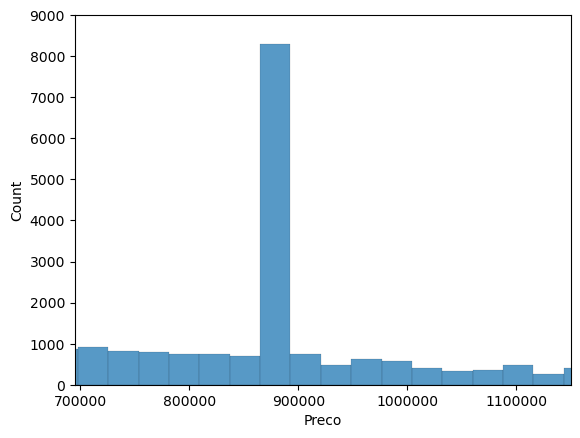

In [25]:
# Neste caso foi necessário adicionar o método FuncFormatter que utiliza a função format_tick que converte
# os valores do eixo x para inteiros antes de exibir no gráfico. Também foi necessário ajustar os limites dos
# eixos x e y para melhor visualização do plot.

from matplotlib.ticker import FuncFormatter
ax = sns.histplot(data=df, x='Preco')
ax.set_xlim(695000, 1150000)
ax.set_ylim(0, 9000)

# Definindo uma função para formatar os rótulos do eixo x como inteiros
def format_tick(tick_val, tick_pos):
    return int(tick_val)
# Aplicando a formatação aos rótulos do eixo x
ax.xaxis.set_major_formatter(FuncFormatter(format_tick))



<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

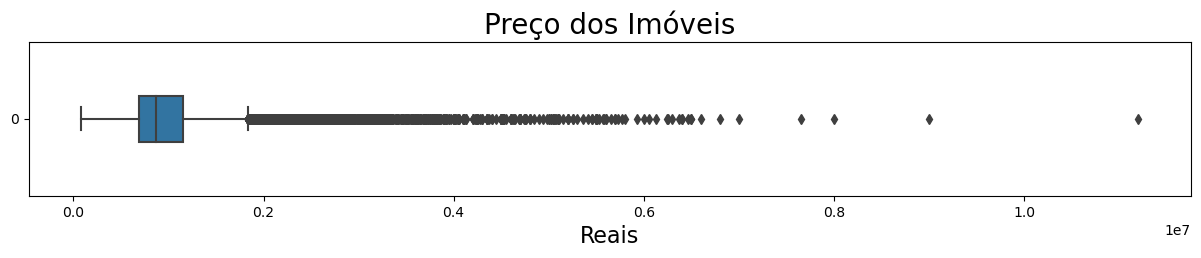

In [26]:
# Gráfico boxplot da variável de interesse.

ax = sns.boxplot(data=df['Preco'], orient='h', width=0.3)
ax.figure.set_size_inches(15, 2)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#### Analisando o boxplot, a distribuição do preço dos imóveis é assimetrica à direita e apresenta outliers!

## *Correlação entre variáveis numéricas*

In [27]:
# Criando uma cópia do dataframe

df_copia = df.copy()

In [28]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Suburbio                  34857 non-null  object 
 1   Endereco                  34857 non-null  object 
 2   Quartos                   34857 non-null  int64  
 3   Tipo                      34857 non-null  object 
 4   Preco                     34857 non-null  int64  
 5   Metodo                    34857 non-null  object 
 6   Vendedor                  34857 non-null  object 
 7   Data                      34857 non-null  object 
 8   Distancia                 34857 non-null  float64
 9   Codigo_Postal             34857 non-null  float64
 10  Quarto_Raspagem           34857 non-null  float64
 11  Banheiro                  34857 non-null  float64
 12  Carro                     34857 non-null  float64
 13  Tamanho_do_Terreno        34857 non-null  float64
 14  Area_C

In [29]:
# Excluindo features do tipo object, deixando apenas features numericas;

df_heat = df_copia.select_dtypes(exclude = 'object')
df_heat.head()

,Quartos,Preco,Distancia,Codigo_Postal,Quarto_Raspagem,Banheiro,Carro,Tamanho_do_Terreno,Area_Construida,Ano_de_Construcao,Latitude,Longitude,Contagem_de_Propriedades
0,2,870000,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,4019.0
1,2,1480000,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,4019.0
2,2,1035000,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,870000,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,4019.0
4,3,1465000,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


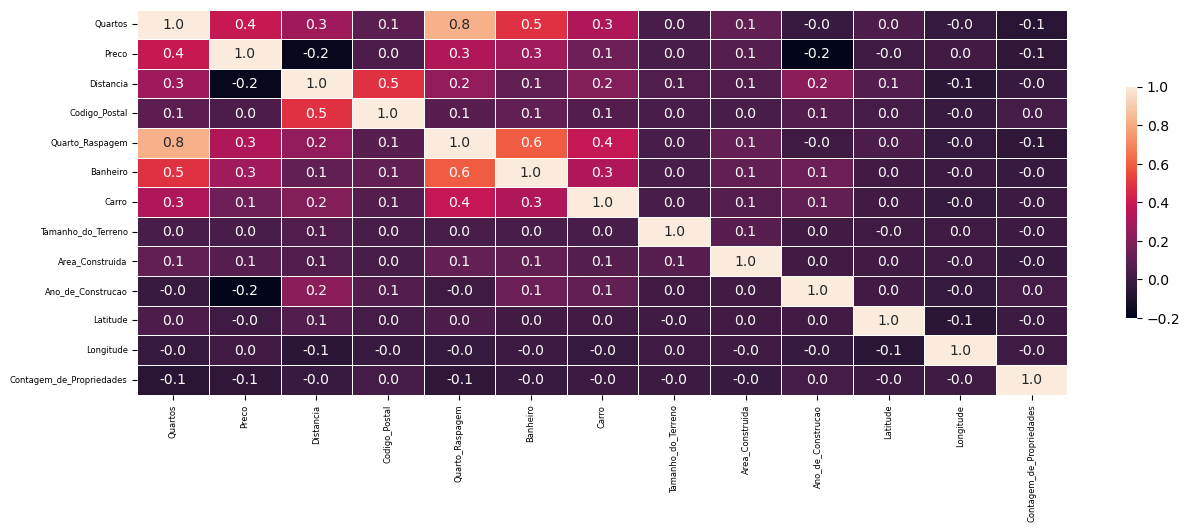

In [30]:
# Gráfico de correlação das features numericas;

plt.figure(figsize = (15, 5))
ax = sns.heatmap(df_heat .corr().round(2), fmt=".1f", linewidths=.6, annot = True,
                 #annot = True,
                 #annot_kws={"size":7},
                 cbar_kws={'shrink': 0.6})
ax.tick_params(labelsize = 6)

In [31]:
# Correlação das features com a variável de interesse 'Preco';

df_heat.corrwith(df_heat['Preco']).sort_values(ascending=False).head(50)

Preco                       1.000000
Quartos                     0.391636
Quarto_Raspagem             0.320101
Banheiro                    0.278823
Carro                       0.137131
Area_Construida             0.065188
Codigo_Postal               0.035050
Tamanho_do_Terreno          0.027306
Longitude                   0.009883
Latitude                   -0.001928
Contagem_de_Propriedades   -0.052816
Distancia                  -0.181799
Ano_de_Construcao          -0.195416
dtype: float64

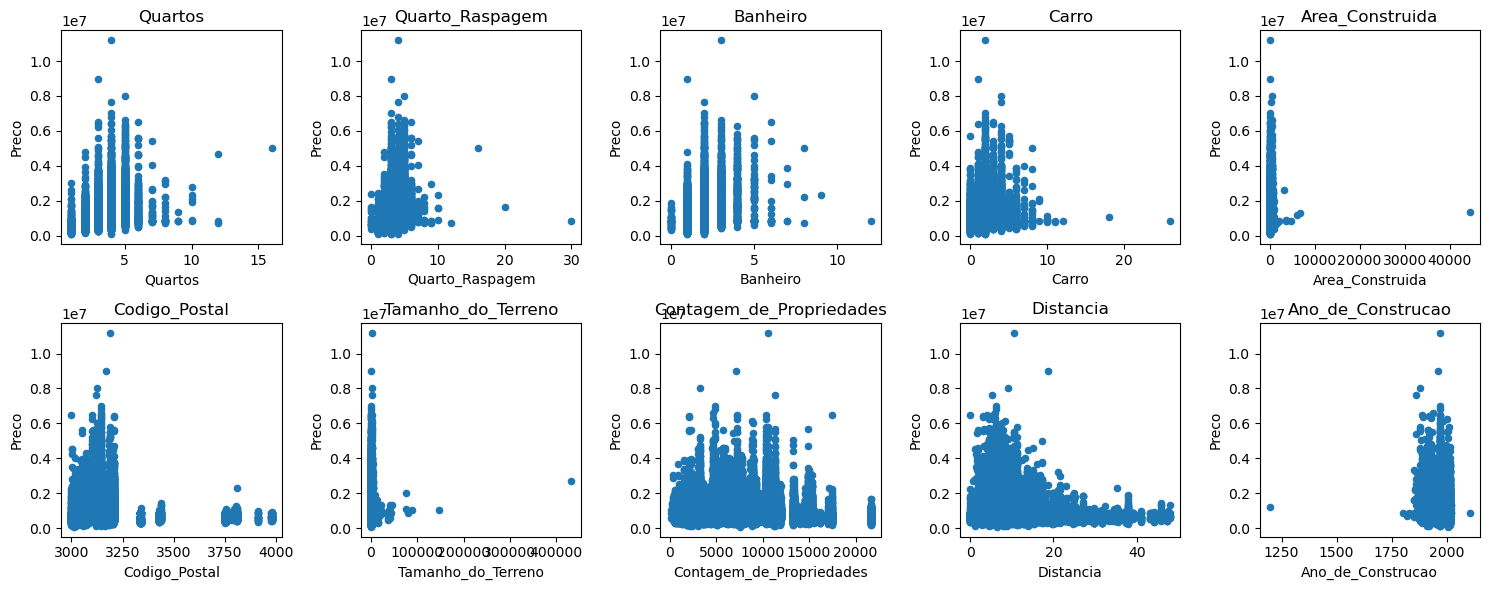

In [32]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, col in enumerate(['Quartos', 'Quarto_Raspagem', 'Banheiro', 'Carro', 'Area_Construida', 'Codigo_Postal',
                         'Tamanho_do_Terreno', 'Contagem_de_Propriedades', 'Distancia', 'Ano_de_Construcao']):
    df.plot.scatter(x=col, y='Preco', ax=axs[i], title=col)

plt.tight_layout()
plt.show()

#### Os resultados da correlação com a nossa variável de interesse ‘Preco’ indicam uma correlação positiva moderada. Para aumentar a correlação, podemos explorar outras abordagens. Uma alternativa é remover os outliers das variáveis numéricas e recalcular a correlação com a variável ‘Preco’;

#### Essa abordagem pode ser útil porque, ao examinar o gráfico de boxplot da variável, observamos valores discrepantes que estão bem acima do esperado e cada vez mais distantes da mediana. Removendo esses valores, podemos obter uma correlação mais forte entre as variáveis.

In [33]:
# Removendo os outliers de cada feature através do cálculo do desvio padrão;

colunas = ['Preco','Quartos', 'Quarto_Raspagem', 'Banheiro', 'Carro', 'Area_Construida', 'Codigo_Postal',
          'Tamanho_do_Terreno', 'Contagem_de_Propriedades', 'Distancia', 'Ano_de_Construcao']


for coluna in colunas:
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()

    limite_inferior = media - 3 * desvio_padrao
    limite_superior = media + 3 * desvio_padrao
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34139 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Suburbio                  34139 non-null  object 
 1   Endereco                  34139 non-null  object 
 2   Quartos                   34139 non-null  int64  
 3   Tipo                      34139 non-null  object 
 4   Preco                     34139 non-null  int64  
 5   Metodo                    34139 non-null  object 
 6   Vendedor                  34139 non-null  object 
 7   Data                      34139 non-null  object 
 8   Distancia                 34139 non-null  float64
 9   Codigo_Postal             34139 non-null  float64
 10  Quarto_Raspagem           34139 non-null  float64
 11  Banheiro                  34139 non-null  float64
 12  Carro                     34139 non-null  float64
 13  Tamanho_do_Terreno        34139 non-null  float64
 14  Area_C

In [34]:
# Excluindo features do tipo object;

df_heat2 = df_filtrado.select_dtypes(exclude = 'object')
df_heat.head()

,Quartos,Preco,Distancia,Codigo_Postal,Quarto_Raspagem,Banheiro,Carro,Tamanho_do_Terreno,Area_Construida,Ano_de_Construcao,Latitude,Longitude,Contagem_de_Propriedades
0,2,870000,2.5,3067.0,2.0,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,4019.0
1,2,1480000,2.5,3067.0,2.0,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,4019.0
2,2,1035000,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,870000,2.5,3067.0,3.0,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,4019.0
4,3,1465000,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [35]:
# Nova correlação com a variável de interesse 'Preco';

df_heat2.corrwith(df_heat2['Preco']).sort_values(ascending=False).head(50)

Preco                       1.000000
Quartos                     0.393856
Quarto_Raspagem             0.319544
Banheiro                    0.276644
Carro                       0.144380
Area_Construida             0.063196
Codigo_Postal               0.034037
Tamanho_do_Terreno          0.028299
Longitude                   0.010622
Latitude                   -0.002262
Contagem_de_Propriedades   -0.054320
Ano_de_Construcao          -0.169481
Distancia                  -0.174559
dtype: float64

#### Após recalcularmos a correlação entre a variável de interesse ‘Preco’ e as features numéricas, removendo os valores outliers, concluímos que não houve uma melhora significativa na correlação, ou seja nos dois conjuntos tem coeficientes de correlação muito semelhantes entre si. As maiores diferenças ocorrem nas correlações entre Preco e Carro, Ano_de_Construcao e Distancia, mas mesmo essas diferenças são relativamente pequenas;

#### Portanto, iremos explorar outras alternativas como a aplicação de uma transformação logarítmica, sendo que a nossa base de dados tem uma distribuição assimétrica e ao aplicar o logaritmo a essas variáveis, podemos tornar sua distribuição mais simétrica e estabilizar sua variância, o que pode melhorar a precisão do modelo estatístico.

### Aplicando a transformação **logarítmica** aos dados do dataset

In [36]:
# Criação de uma cópia do dataframe;

df_log = df_copia.copy()

In [37]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Suburbio                  34857 non-null  object 
 1   Endereco                  34857 non-null  object 
 2   Quartos                   34857 non-null  int64  
 3   Tipo                      34857 non-null  object 
 4   Preco                     34857 non-null  int64  
 5   Metodo                    34857 non-null  object 
 6   Vendedor                  34857 non-null  object 
 7   Data                      34857 non-null  object 
 8   Distancia                 34857 non-null  float64
 9   Codigo_Postal             34857 non-null  float64
 10  Quarto_Raspagem           34857 non-null  float64
 11  Banheiro                  34857 non-null  float64
 12  Carro                     34857 non-null  float64
 13  Tamanho_do_Terreno        34857 non-null  float64
 14  Area_C

In [38]:
# Transformação logaritmica nas variavéis;

df_log['Preco_log'] = (df_copia['Preco']+1).apply(np.log)
df_log['Quartos_log'] = (df_copia['Quartos']+1).apply(np.log)
df_log['Distancia_log'] = (df_copia['Distancia']+1).apply(np.log)
df_log['Codigo_Postal_log'] = (df_copia['Codigo_Postal']+1).apply(np.log)
df_log['Quarto_Raspagem_log'] = (df_copia['Quarto_Raspagem']+1).apply(np.log)
df_log['Banheiro_log'] = (df_copia['Banheiro']+1).apply(np.log)
df_log['Carro_log'] = (df_copia['Carro']+1).apply(np.log)
df_log['Tamanho_do_Terreno_log'] = (df_copia['Tamanho_do_Terreno']+1).apply(np.log)
df_log['Area_Construida_log'] = (df_copia['Area_Construida']+1).apply(np.log)
df_log['Ano_de_Construcao_log'] = (df_copia['Ano_de_Construcao']+1).apply(np.log)
df_log['Contagem_de_Propriedades_log'] = (df_copia['Contagem_de_Propriedades']+1).apply(np.log)

In [39]:
df_log_final = df_log[['Preco_log','Quartos_log', 'Distancia_log', 'Codigo_Postal_log', 'Quarto_Raspagem_log', 'Banheiro_log',
           'Carro_log', 'Tamanho_do_Terreno_log', 'Area_Construida_log', 'Ano_de_Construcao_log',
           'Contagem_de_Propriedades_log']]

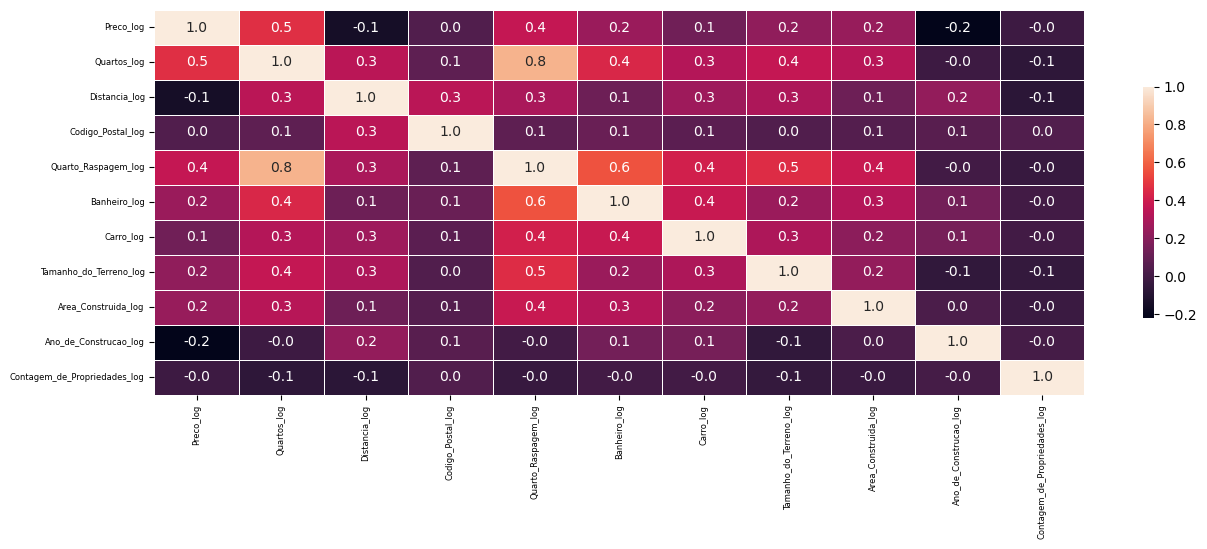

In [40]:
# # Gráfico de correlação;

plt.figure(figsize = (15, 5))
ax = sns.heatmap(df_log_final .corr().round(2), fmt=".1f", linewidths=.6, annot = True,
                 #annot = True,
                 #annot_kws={"size":7},
                 cbar_kws={'shrink': 0.6})
ax.tick_params(labelsize = 6)

In [41]:
# Correlação das features sem outliers com a variável de interesse 'Preco';

df_log_final.corrwith(df_log_final['Preco_log']).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_log                     0.472831
Quarto_Raspagem_log             0.373079
Banheiro_log                    0.253888
Area_Construida_log             0.236704
Tamanho_do_Terreno_log          0.223987
Carro_log                       0.130566
Codigo_Postal_log               0.036283
Contagem_de_Propriedades_log   -0.023797
Distancia_log                  -0.145753
Ano_de_Construcao_log          -0.220447
dtype: float64

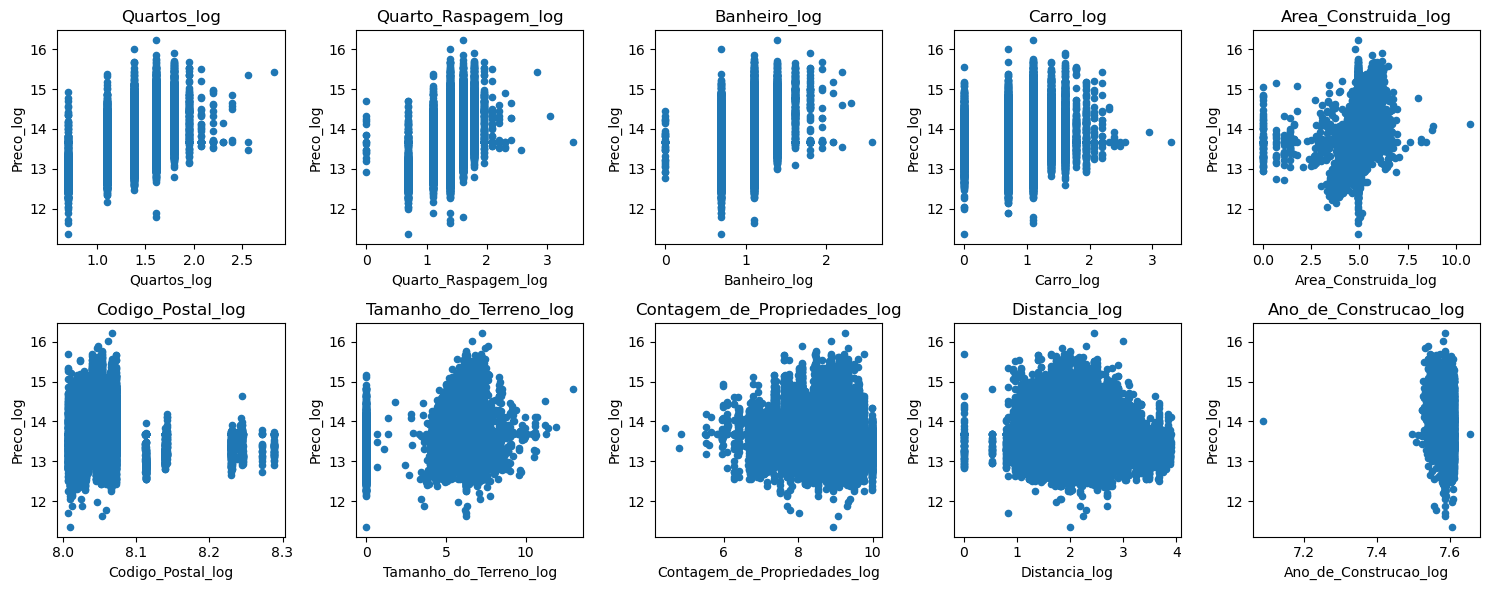

In [42]:
# Gráfico de dispersão das features;

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i, col in enumerate(['Quartos_log', 'Quarto_Raspagem_log', 'Banheiro_log', 'Carro_log', 'Area_Construida_log', 'Codigo_Postal_log',
                         'Tamanho_do_Terreno_log', 'Contagem_de_Propriedades_log', 'Distancia_log', 'Ano_de_Construcao_log']):
    df_log_final.plot.scatter(x=col, y='Preco_log', ax=axs[i], title=col)

plt.tight_layout()
plt.show()

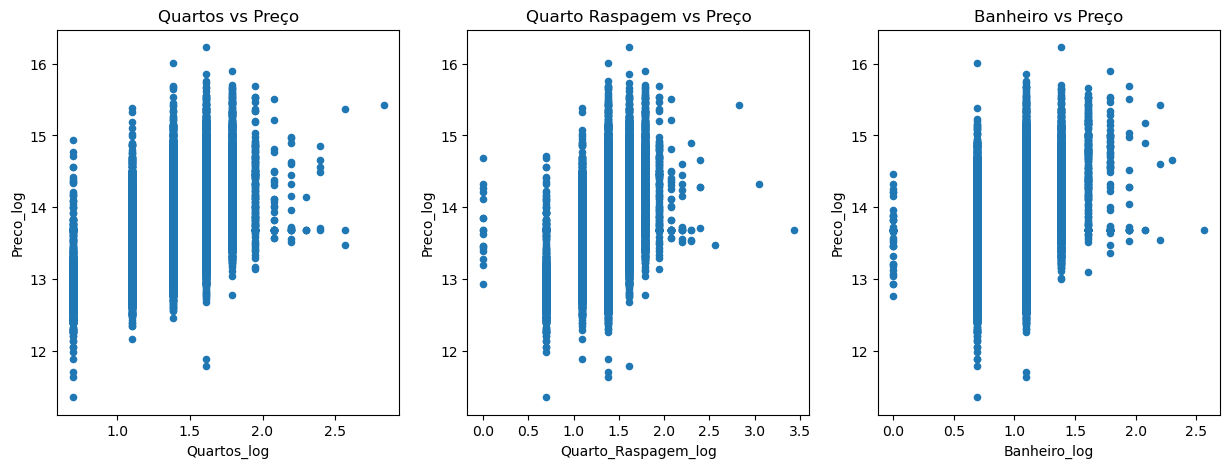

In [43]:
# Criando um gráfico de dispersão apenas para as variáveis Quartos_log, Quarto_Raspagem_log, Banheiro_log;

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
df_log_final.plot.scatter(x='Quartos_log', y='Preco_log', ax=axs[0])
df_log_final.plot.scatter(x='Quarto_Raspagem_log', y='Preco_log', ax=axs[1])
df_log_final.plot.scatter(x='Banheiro_log', y='Preco_log', ax=axs[2])
axs[0].set_title('Quartos vs Preço')
axs[1].set_title('Quarto Raspagem vs Preço')
axs[2].set_title('Banheiro vs Preço')
plt.show()

#### Os gráficos indicam que existe uma correlação positiva entre o preço de uma propriedade e o número de quartos, o tamanho dos quartos e o número de banheiros. No entanto, a relação não é perfeitamente linear e há uma grande variação nos preços para um determinado valor dessas variáveis. 

#### Além da correlação positiva dessas características com a variável dependente, suspeitamos que possa haver multicolinearidade entre elas. Portanto, iremos analisar se existe ou não multicolinearidade e tratar esses dados adequadamente.

## *Engenharia de atributos*

In [44]:
# Verificando a matriz de correlação das features;

corr_matrix = df_log_final.corr()
print(corr_matrix)

                              Preco_log  Quartos_log  Distancia_log  \
Preco_log                      1.000000     0.472831      -0.145753   
Quartos_log                    0.472831     1.000000       0.342047   
Distancia_log                 -0.145753     0.342047       1.000000   
Codigo_Postal_log              0.036283     0.081553       0.343951   
Quarto_Raspagem_log            0.373079     0.817545       0.293760   
Banheiro_log                   0.253888     0.437291       0.119946   
Carro_log                      0.130566     0.315475       0.261530   
Tamanho_do_Terreno_log         0.223987     0.371188       0.298484   
Area_Construida_log            0.236704     0.331588       0.117946   
Ano_de_Construcao_log         -0.220447    -0.022589       0.227564   
Contagem_de_Propriedades_log  -0.023797    -0.066798      -0.081826   

                              Codigo_Postal_log  Quarto_Raspagem_log  \
Preco_log                              0.036283             0.373079   
Qua

In [45]:
# Criando uma máscara booleana para identificar os valores maiores que 0.5;

corr_matrix = df_log_final.corr()
mask = corr_matrix.applymap(lambda x: x > 0.5)
result = corr_matrix[mask]
print(result)

                              Preco_log  Quartos_log  Distancia_log  \
Preco_log                           1.0          NaN            NaN   
Quartos_log                         NaN     1.000000            NaN   
Distancia_log                       NaN          NaN            1.0   
Codigo_Postal_log                   NaN          NaN            NaN   
Quarto_Raspagem_log                 NaN     0.817545            NaN   
Banheiro_log                        NaN          NaN            NaN   
Carro_log                           NaN          NaN            NaN   
Tamanho_do_Terreno_log              NaN          NaN            NaN   
Area_Construida_log                 NaN          NaN            NaN   
Ano_de_Construcao_log               NaN          NaN            NaN   
Contagem_de_Propriedades_log        NaN          NaN            NaN   

                              Codigo_Postal_log  Quarto_Raspagem_log  \
Preco_log                                   NaN                  NaN   
Qua

#### De acordo com a matriz de correlação, as variáveis “Quartos_log” e “Quarto_Raspagem_log” apresentam uma correlação alta (0.823813), o que pode indicar a presença de multicolinearidade entre essas duas variáveis.

#### Um vez que a multicolinearidade entre ambas estejam altas, podemos criar novas features para melhorar a distribuição dos dados. 

In [46]:
# Criando uma novo dataset;

df_new_fet = df_log_final.copy()

In [47]:
df_new_fet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Preco_log                     34857 non-null  float64
 1   Quartos_log                   34857 non-null  float64
 2   Distancia_log                 34857 non-null  float64
 3   Codigo_Postal_log             34857 non-null  float64
 4   Quarto_Raspagem_log           34857 non-null  float64
 5   Banheiro_log                  34857 non-null  float64
 6   Carro_log                     34857 non-null  float64
 7   Tamanho_do_Terreno_log        34857 non-null  float64
 8   Area_Construida_log           34857 non-null  float64
 9   Ano_de_Construcao_log         34857 non-null  float64
 10  Contagem_de_Propriedades_log  34857 non-null  float64
dtypes: float64(11)
memory usage: 2.9 MB


In [48]:
# Criando novas features

df_new_fet['Quartos_Total'] = df_log_final['Quartos_log'] + df_log_final['Quarto_Raspagem_log']
df_new_fet['Quartos_por_Banheiro'] = df_log_final['Quartos_log'] + df_log_final['Quarto_Raspagem_log'] / df_log_final['Banheiro_log']


In [49]:
df_new_fet[['Contagem_de_Propriedades_log','Ano_de_Construcao_log','Area_Construida_log',
            'Tamanho_do_Terreno_log', 'Carro_log','Quartos_Total','Quartos_por_Banheiro']]

,Contagem_de_Propriedades_log,Ano_de_Construcao_log,Area_Construida_log,Tamanho_do_Terreno_log,Carro_log,Quartos_Total,Quartos_por_Banheiro
0,8.299037,7.586296,4.919981,4.844187,0.693147,2.197225,2.683575
1,8.299037,7.586296,4.919981,5.313206,0.693147,2.197225,2.683575
2,8.299037,7.550135,4.382027,5.056246,0.000000,2.197225,2.683575
3,8.299037,7.586296,4.919981,0.000000,0.693147,2.772589,2.648154
4,8.299037,7.550135,5.017280,4.905275,0.000000,2.772589,2.648154
...,...,...,...,...,...,...,...
34852,8.786304,7.586296,4.919981,6.386879,1.386294,3.218876,3.931366
34853,8.786304,7.610358,4.653960,4.595120,0.693147,2.197225,2.098612
34854,8.786304,7.601402,4.795791,5.398163,1.098612,2.197225,2.683575
34855,8.786304,7.586296,4.919981,6.257668,1.098612,2.772589,2.648154


In [50]:
print(df_new_fet.dtypes)

Preco_log                       float64
Quartos_log                     float64
Distancia_log                   float64
Codigo_Postal_log               float64
Quarto_Raspagem_log             float64
Banheiro_log                    float64
Carro_log                       float64
Tamanho_do_Terreno_log          float64
Area_Construida_log             float64
Ano_de_Construcao_log           float64
Contagem_de_Propriedades_log    float64
Quartos_Total                   float64
Quartos_por_Banheiro            float64
dtype: object


In [51]:
df_fets = df_new_fet[['Contagem_de_Propriedades_log','Ano_de_Construcao_log','Area_Construida_log',
                 'Tamanho_do_Terreno_log', 'Carro_log','Quartos_Total','Quartos_por_Banheiro']]

In [52]:
df_fets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Contagem_de_Propriedades_log  34857 non-null  float64
 1   Ano_de_Construcao_log         34857 non-null  float64
 2   Area_Construida_log           34857 non-null  float64
 3   Tamanho_do_Terreno_log        34857 non-null  float64
 4   Carro_log                     34857 non-null  float64
 5   Quartos_Total                 34857 non-null  float64
 6   Quartos_por_Banheiro          34850 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


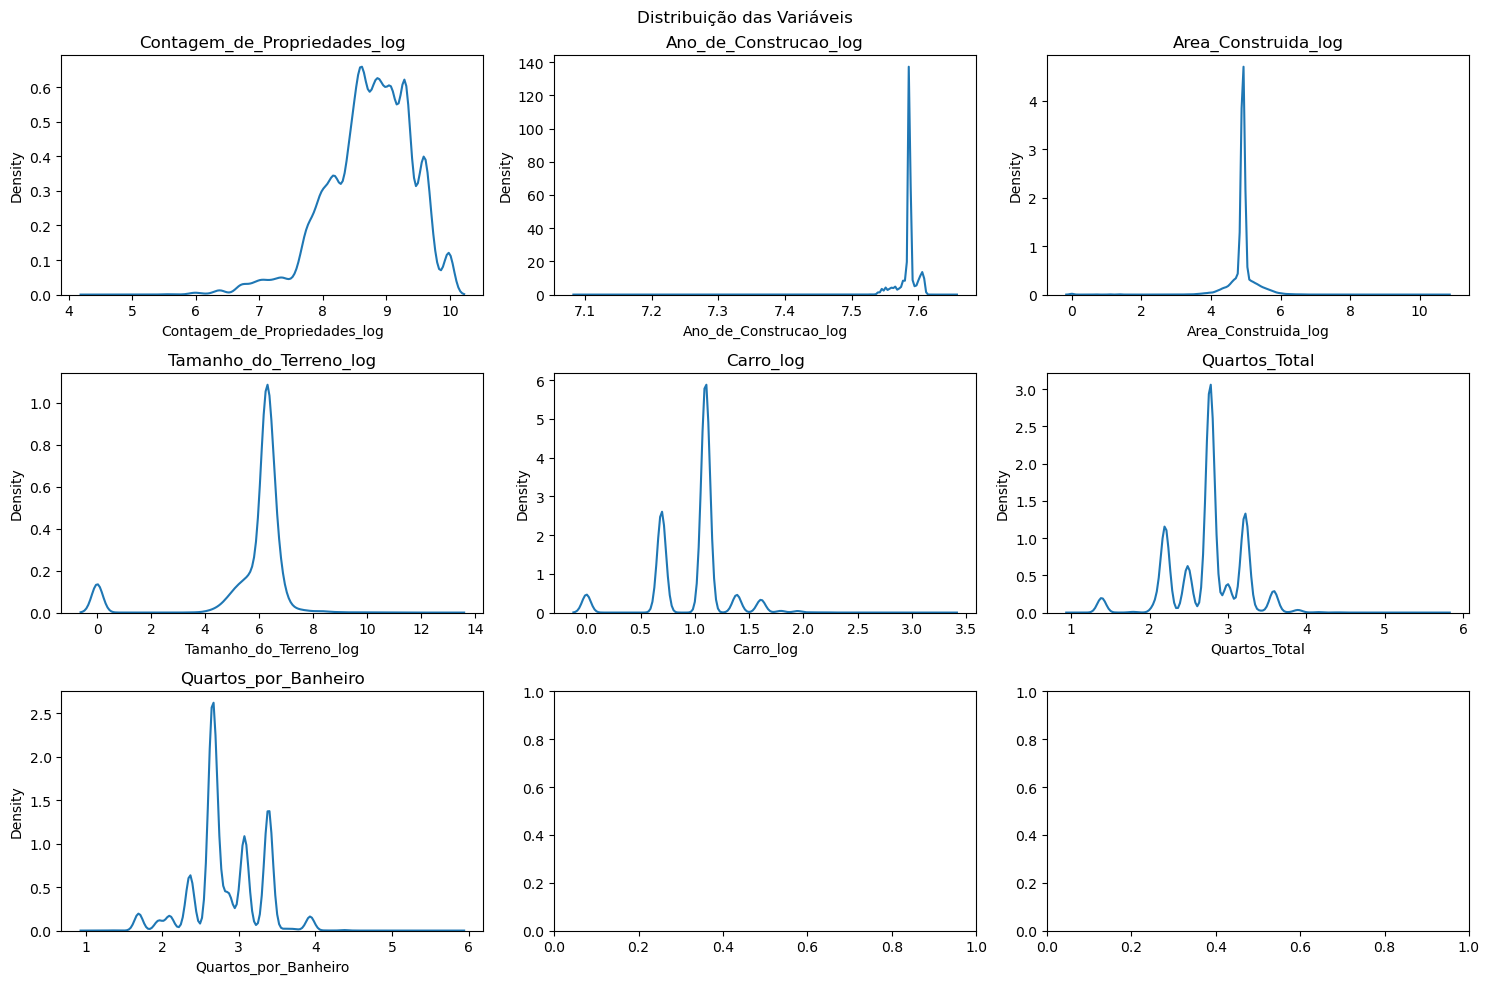

In [53]:

fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df_fets.columns):
    sns.kdeplot(data=df_fets, x=col, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col)

# Adicione um título geral aos gráficos
fig.suptitle('Distribuição das Variáveis')
plt.tight_layout()

# Exiba os gráficos
plt.show()

In [54]:
df_fets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Contagem_de_Propriedades_log  34857 non-null  float64
 1   Ano_de_Construcao_log         34857 non-null  float64
 2   Area_Construida_log           34857 non-null  float64
 3   Tamanho_do_Terreno_log        34857 non-null  float64
 4   Carro_log                     34857 non-null  float64
 5   Quartos_Total                 34857 non-null  float64
 6   Quartos_por_Banheiro          34850 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


/usr/lib/python3/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='Quartos_por_Banheiro', ylabel='Preco_log'>

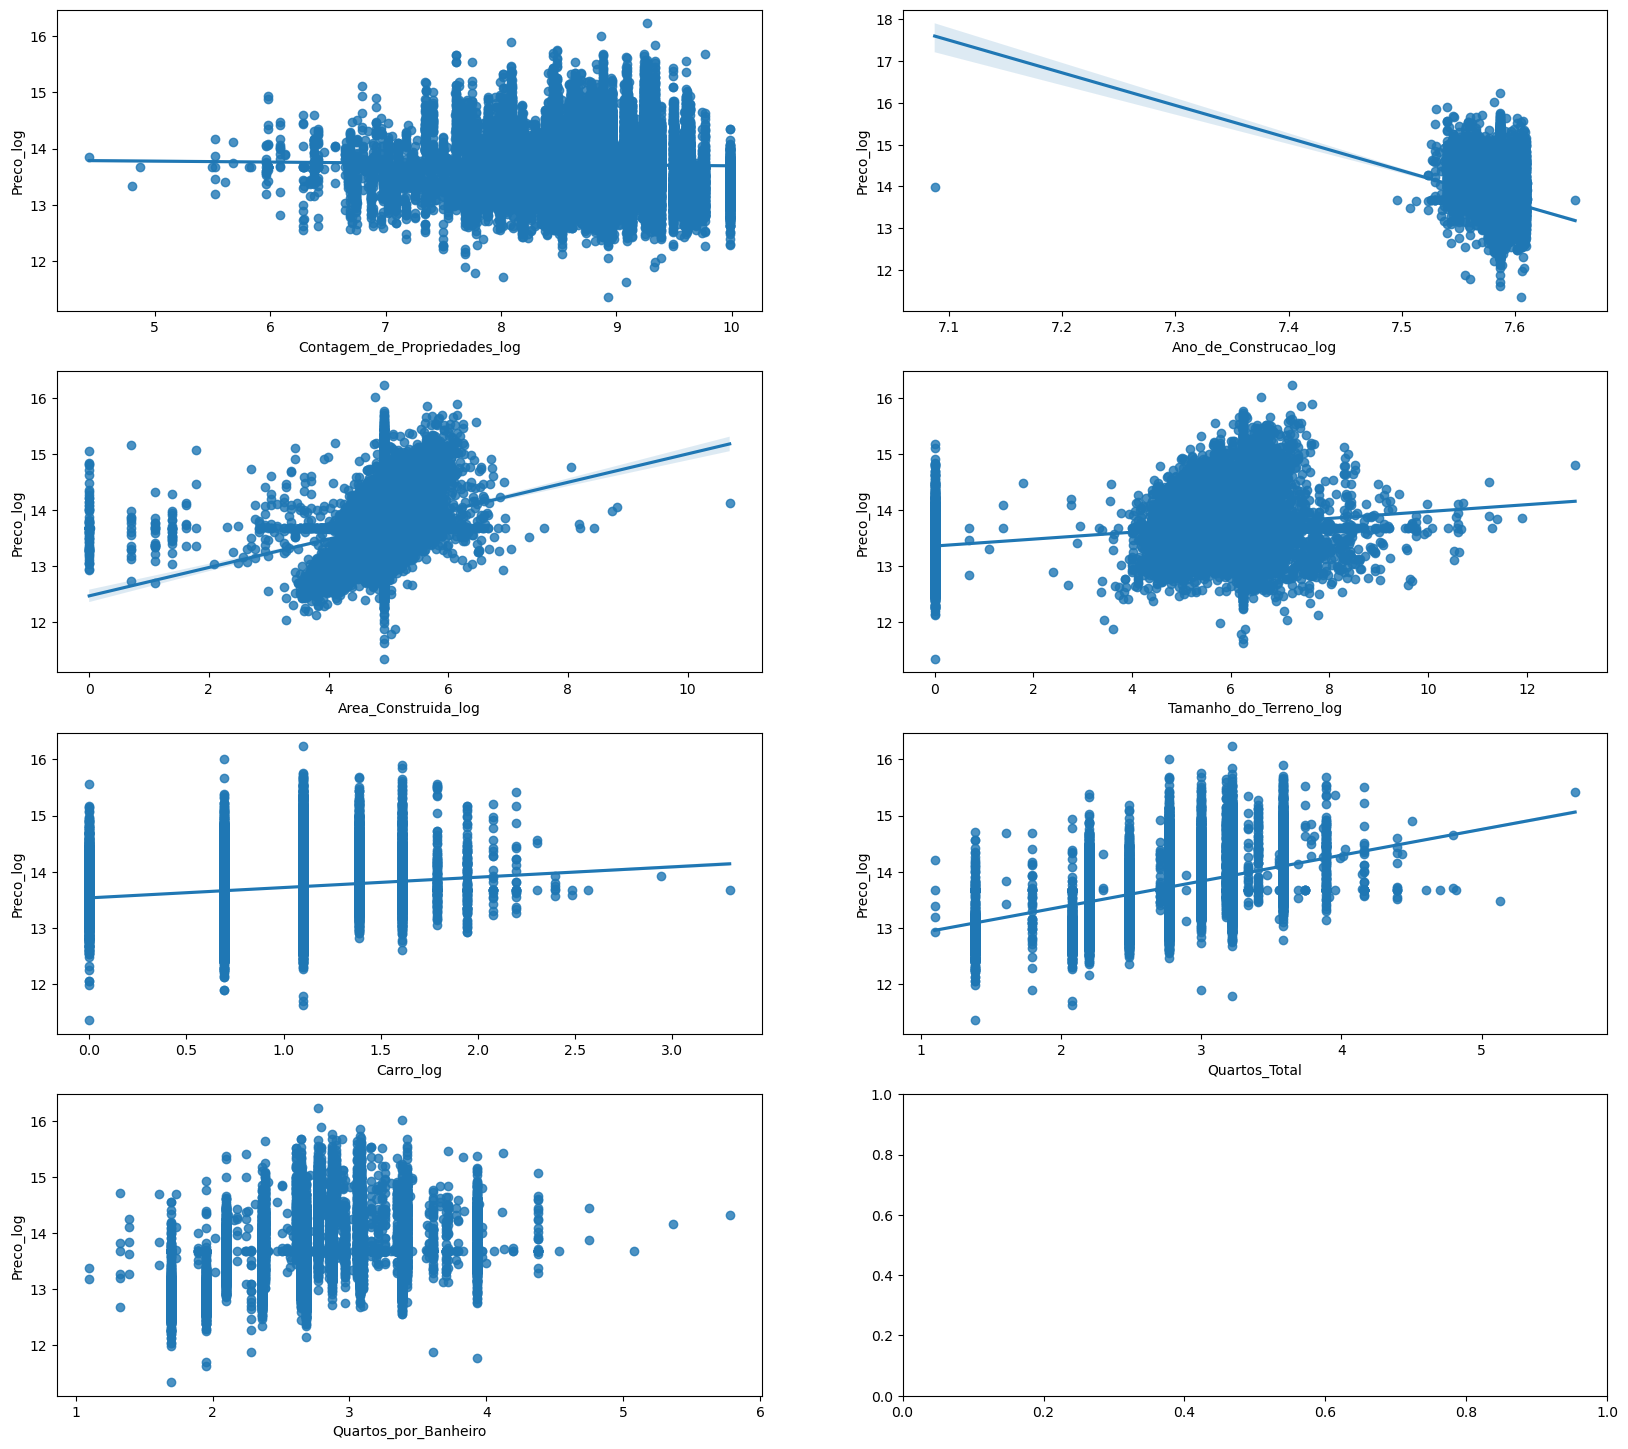

In [55]:
fig, ax = plt.subplots(4,2, figsize=(20,18))

sns.regplot(x=df_fets['Contagem_de_Propriedades_log'],y=df_log_final['Preco_log'],ax=ax[0,0])
sns.regplot(x=df_fets['Ano_de_Construcao_log'],y=df_log_final['Preco_log'],ax=ax[0,1])
sns.regplot(x=df_fets['Area_Construida_log'],y=df_log_final['Preco_log'],ax=ax[1,0])
sns.regplot(x=df_fets['Tamanho_do_Terreno_log'],y=df_log_final['Preco_log'],ax=ax[1,1])
sns.regplot(x=df_fets['Carro_log'],y=df_log_final['Preco_log'],ax=ax[2,0])
sns.regplot(x=df_fets['Quartos_Total'],y=df_log_final['Preco_log'],ax=ax[2,1])
sns.regplot(x=df_fets['Quartos_por_Banheiro'],y=df_log_final['Preco_log'],ax=ax[3,0])

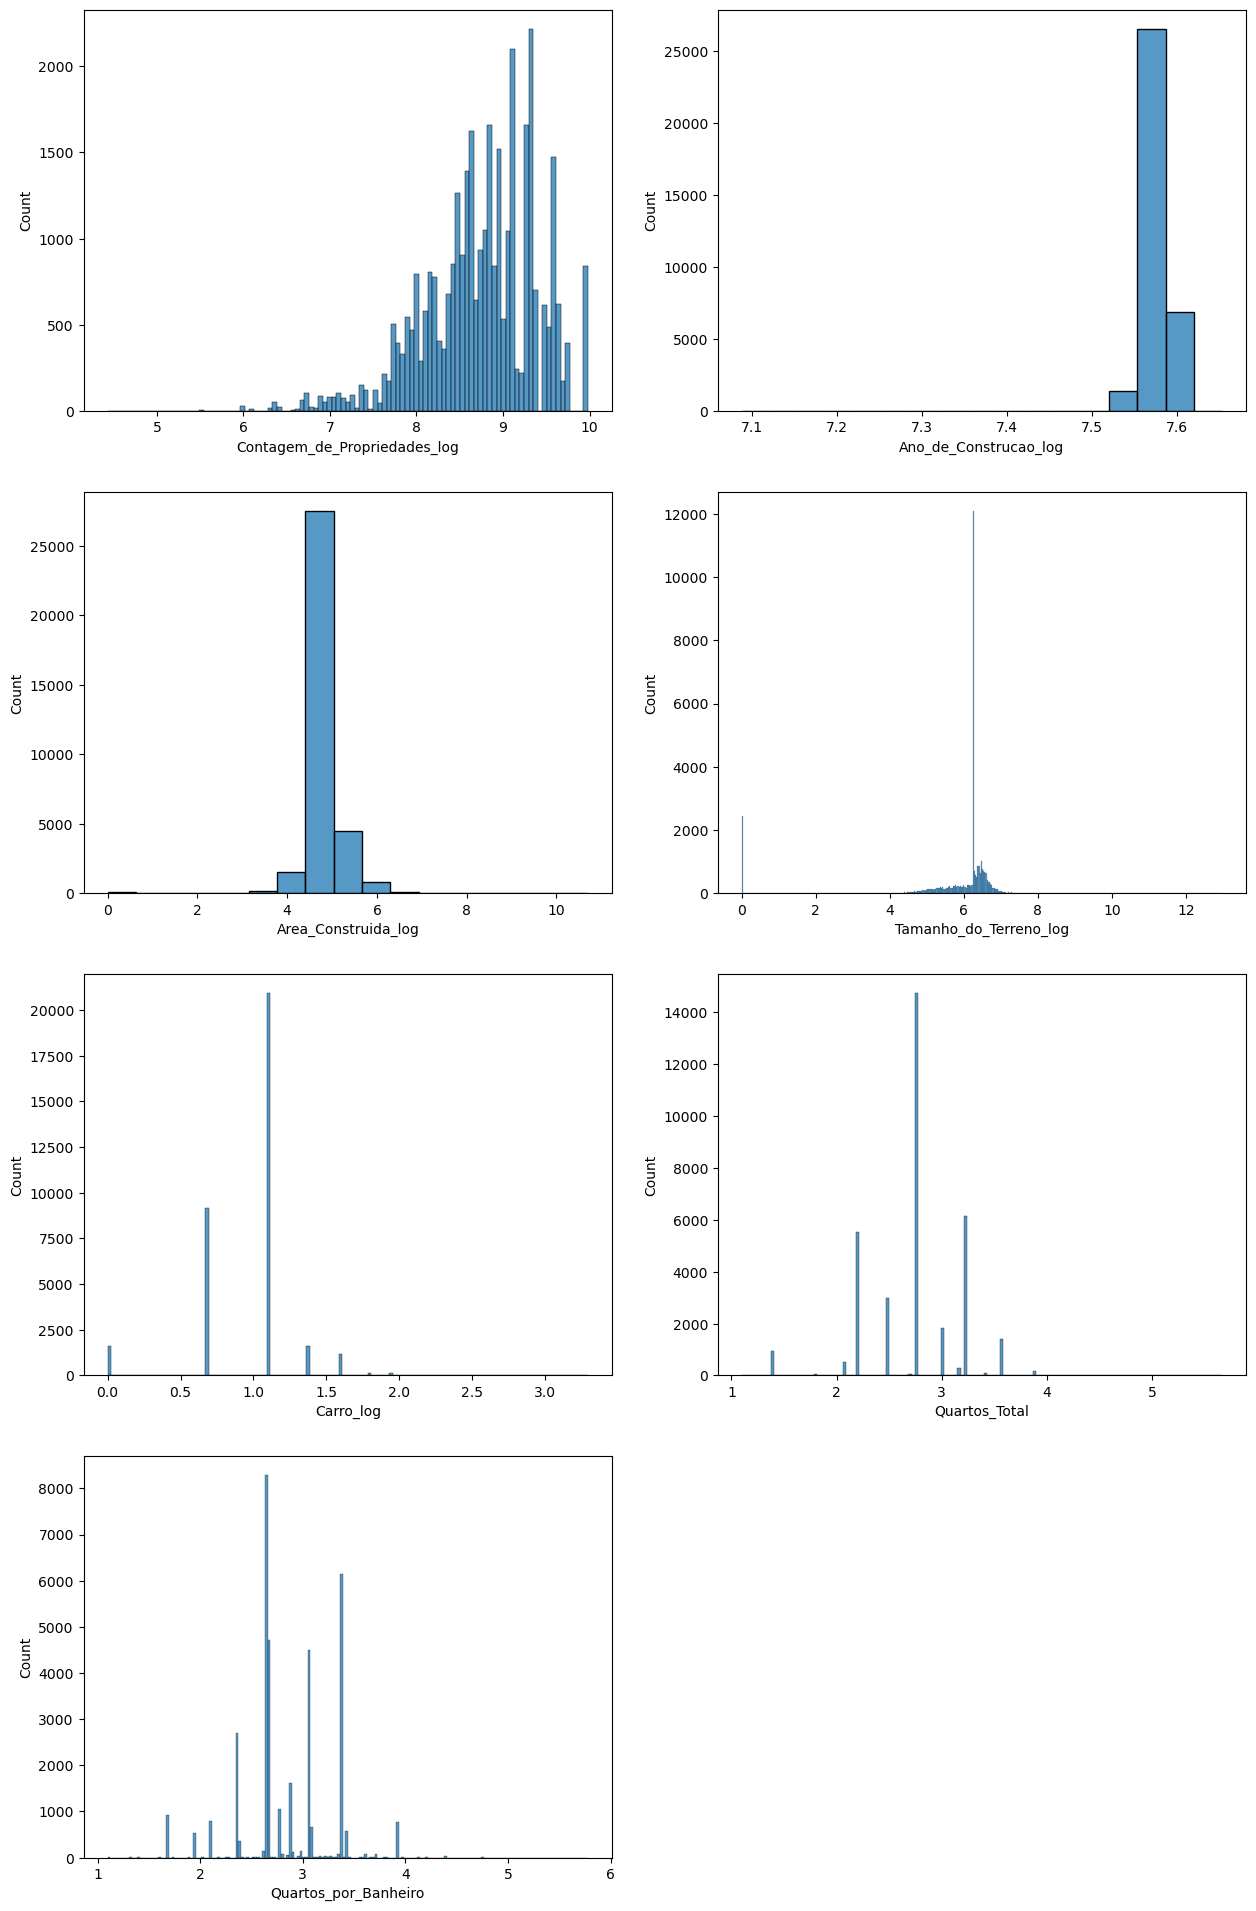

In [56]:
fig = plt.figure(figsize=(15, 24))

for i, column in enumerate(df_fets.columns):
  ax = fig.add_subplot(4, 2, i+1)
  sns.histplot(df_new_fet[column])

<AxesSubplot:>

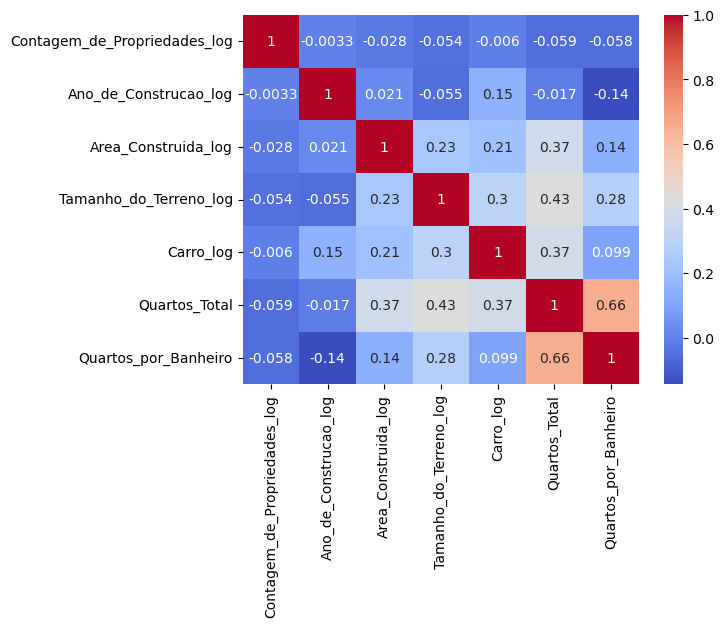

In [57]:
# Criando um mapa de calor com a matriz de correlação

corr_matrix = df_fets.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [58]:
df_new_fet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Preco_log                     34857 non-null  float64
 1   Quartos_log                   34857 non-null  float64
 2   Distancia_log                 34857 non-null  float64
 3   Codigo_Postal_log             34857 non-null  float64
 4   Quarto_Raspagem_log           34857 non-null  float64
 5   Banheiro_log                  34857 non-null  float64
 6   Carro_log                     34857 non-null  float64
 7   Tamanho_do_Terreno_log        34857 non-null  float64
 8   Area_Construida_log           34857 non-null  float64
 9   Ano_de_Construcao_log         34857 non-null  float64
 10  Contagem_de_Propriedades_log  34857 non-null  float64
 11  Quartos_Total                 34857 non-null  float64
 12  Quartos_por_Banheiro          34850 non-null  float64
dtypes

In [59]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_log                     0.472831
Quartos_Total                   0.447397
Quarto_Raspagem_log             0.373079
Banheiro_log                    0.253888
Area_Construida_log             0.236704
Tamanho_do_Terreno_log          0.223987
Carro_log                       0.130566
Codigo_Postal_log               0.036283
Contagem_de_Propriedades_log   -0.023797
Distancia_log                  -0.145753
Ano_de_Construcao_log          -0.220447
Quartos_por_Banheiro                 NaN
dtype: float64

#### Neste ponto, suspeitamos que após a transformação logarítimica alguns valores na features Quartos_por_Banheiro tenham se tornado NaN ou infinitos devido a presença de valores negativos ou zero no conjunto de dados, lembrando que a trsnformação é utilizado apenas em valores positivos!

In [60]:
df_new_fet = df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Codigo_Postal_log', 'Carro_log', 
                        'Tamanho_do_Terreno_log', 'Area_Construida_log', 'Ano_de_Construcao_log', 'Contagem_de_Propriedades_log']]

In [61]:
# Verificando se existe valores NaN na feature 'Quartos_por_Banheiro'

has_nan = df_new_fet['Quartos_por_Banheiro'].isna().any()
print(f"A coluna 'Quartos_por_Banheiro' {'tem' if has_nan else 'não tem'} valores NaN.")

A coluna 'Quartos_por_Banheiro' tem valores NaN.


In [62]:
# Verificando se existe valores infinitos na feature 'Quartos_por_Banheiro'

has_inf = np.isinf(df_new_fet['Quartos_por_Banheiro']).any()
print(f"A coluna 'Quartos_por_Banheiro' {'tem' if has_inf else 'não tem'} valores infinitos.")

A coluna 'Quartos_por_Banheiro' tem valores infinitos.


In [63]:
# Quantificando o número de valores NaN ou infinitos

df_new_fet.isnull().sum()

Preco_log                       0
Quartos_Total                   0
Quartos_por_Banheiro            7
Codigo_Postal_log               0
Carro_log                       0
Tamanho_do_Terreno_log          0
Area_Construida_log             0
Ano_de_Construcao_log           0
Contagem_de_Propriedades_log    0
dtype: int64

In [64]:
# Removendo linhas que contêm valores NaN

df_new_fet = df_new_fet.replace([np.inf, -np.inf], np.nan)
df_new_fet = df_new_fet.dropna()

In [65]:
# Nova verificação após a exclusão de valores NaN ou infinitos

df_new_fet.isnull().sum()

Preco_log                       0
Quartos_Total                   0
Quartos_por_Banheiro            0
Codigo_Postal_log               0
Carro_log                       0
Tamanho_do_Terreno_log          0
Area_Construida_log             0
Ano_de_Construcao_log           0
Contagem_de_Propriedades_log    0
dtype: int64

In [66]:
# Nova correlação, agora com as duas features criadas

df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_Total                   0.447824
Quartos_por_Banheiro            0.282856
Area_Construida_log             0.236820
Tamanho_do_Terreno_log          0.223817
Carro_log                       0.130644
Codigo_Postal_log               0.036238
Contagem_de_Propriedades_log   -0.024245
Ano_de_Construcao_log          -0.220500
dtype: float64

#### Ainda a colinearidade está alta entre algumas features. Dessa forma, iremos continuar criando novas features

In [67]:
corr_matrix = df_new_fet.corr()
print(corr_matrix)

                              Preco_log  Quartos_Total  Quartos_por_Banheiro  \
Preco_log                      1.000000       0.447824              0.282856   
Quartos_Total                  0.447824       1.000000              0.655091   
Quartos_por_Banheiro           0.282856       0.655091              1.000000   
Codigo_Postal_log              0.036238       0.083947             -0.011654   
Carro_log                      0.130644       0.373770              0.098895   
Tamanho_do_Terreno_log         0.223817       0.430034              0.277378   
Area_Construida_log            0.236820       0.372526              0.139003   
Ano_de_Construcao_log         -0.220500      -0.016987             -0.144565   
Contagem_de_Propriedades_log  -0.024245      -0.059440             -0.057629   

                              Codigo_Postal_log  Carro_log  \
Preco_log                              0.036238   0.130644   
Quartos_Total                          0.083947   0.373770   
Quartos_por_B

In [68]:
# Criando a nova features Area_total

df_new_fet['Area_Total'] = df_log_final['Area_Construida_log'] + df_log_final['Tamanho_do_Terreno_log']

In [69]:
df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Codigo_Postal_log', 'Carro_log', 
                        'Tamanho_do_Terreno_log', 'Area_Construida_log', 'Ano_de_Construcao_log', 'Contagem_de_Propriedades_log', 'Area_Total']]

,Preco_log,Quartos_Total,Quartos_por_Banheiro,Codigo_Postal_log,Carro_log,Tamanho_do_Terreno_log,Area_Construida_log,Ano_de_Construcao_log,Contagem_de_Propriedades_log,Area_Total
0,13.676250,2.197225,2.683575,8.028781,0.693147,4.844187,4.919981,7.586296,8.299037,9.764168
1,14.207553,2.197225,2.683575,8.028781,0.693147,5.313206,4.919981,7.586296,8.299037,10.233187
2,13.849913,2.197225,2.683575,8.028781,0.000000,5.056246,4.382027,7.550135,8.299037,9.438272
3,13.676250,2.772589,2.648154,8.028781,0.693147,0.000000,4.919981,7.586296,8.299037,4.919981
4,14.197366,2.772589,2.648154,8.028781,0.000000,4.905275,5.017280,7.550135,8.299037,9.922555
...,...,...,...,...,...,...,...,...,...,...
34852,14.207553,3.218876,3.931366,8.011023,1.386294,6.386879,4.919981,7.586296,8.786304,11.306860
34853,13.696728,2.197225,2.098612,8.011023,0.693147,4.595120,4.653960,7.610358,8.786304,9.249080
34854,13.465955,2.197225,2.683575,8.011023,1.098612,5.398163,4.795791,7.601402,8.786304,10.193953
34855,13.946540,2.772589,2.648154,8.011023,1.098612,6.257668,4.919981,7.586296,8.786304,11.177649


In [70]:
df_fets = df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Codigo_Postal_log', 'Carro_log', 
                        'Tamanho_do_Terreno_log', 'Area_Construida_log', 'Ano_de_Construcao_log', 'Contagem_de_Propriedades_log', 'Area_Total']]

In [71]:
df_fets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34811 entries, 0 to 34856
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Preco_log                     34811 non-null  float64
 1   Quartos_Total                 34811 non-null  float64
 2   Quartos_por_Banheiro          34811 non-null  float64
 3   Codigo_Postal_log             34811 non-null  float64
 4   Carro_log                     34811 non-null  float64
 5   Tamanho_do_Terreno_log        34811 non-null  float64
 6   Area_Construida_log           34811 non-null  float64
 7   Ano_de_Construcao_log         34811 non-null  float64
 8   Contagem_de_Propriedades_log  34811 non-null  float64
 9   Area_Total                    34811 non-null  float64
dtypes: float64(10)
memory usage: 2.9 MB


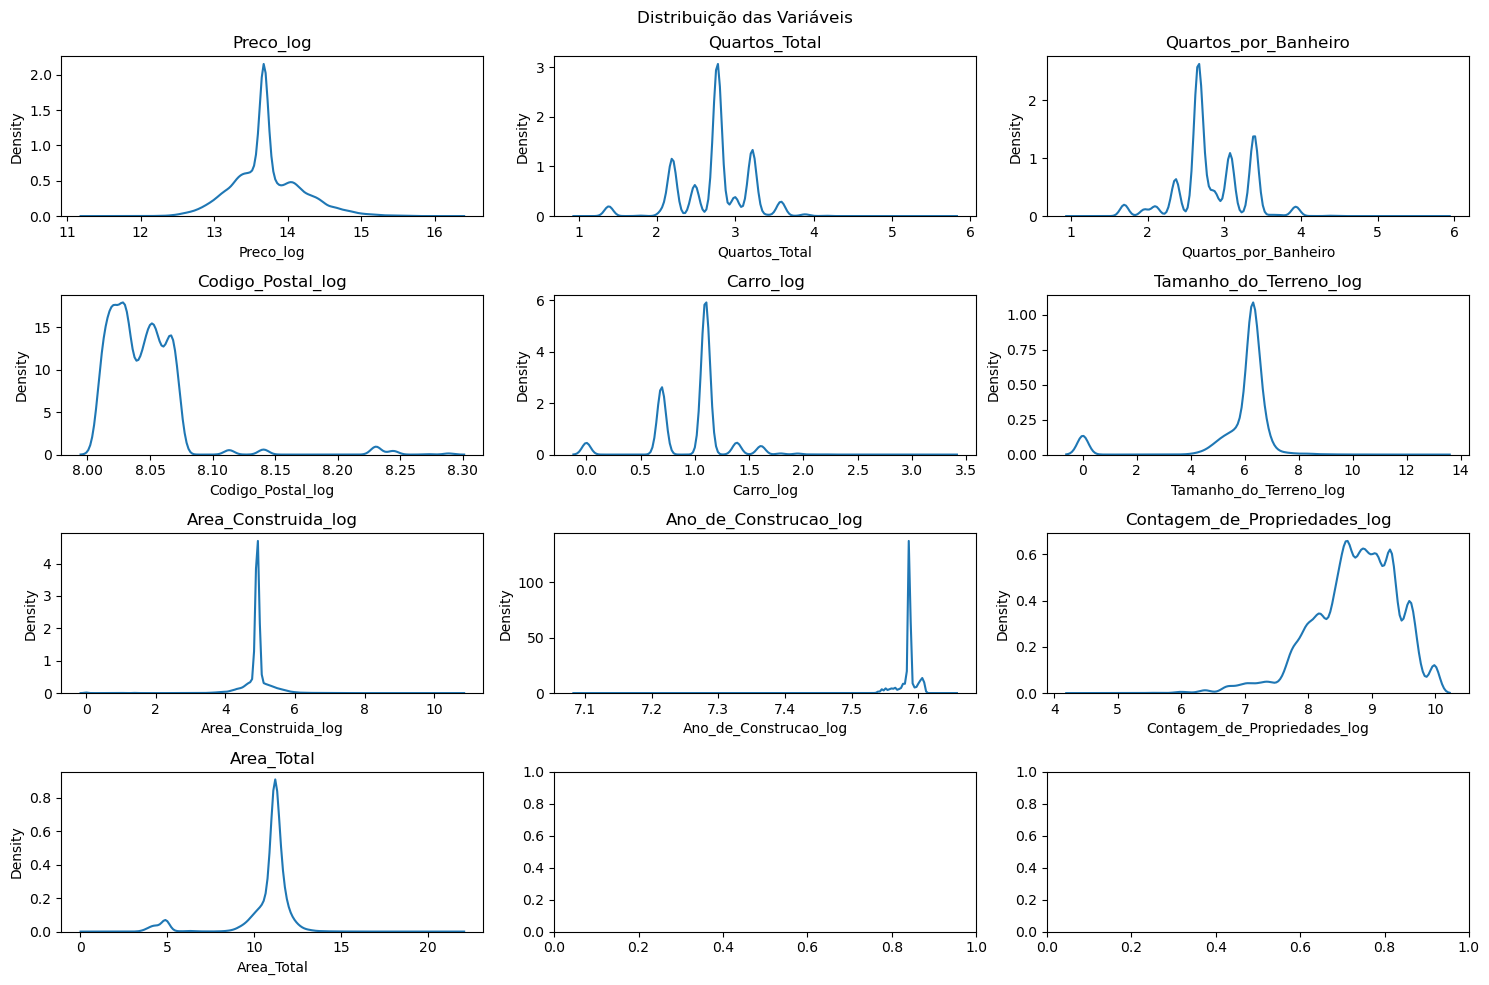

In [72]:
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
for i, col in enumerate(df_fets.columns):
    sns.kdeplot(data=df_fets, x=col, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(col)

# Adicione um título geral aos gráficos
fig.suptitle('Distribuição das Variáveis')
plt.tight_layout()

# Exiba os gráficos
plt.show()

In [73]:
df_fets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34811 entries, 0 to 34856
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Preco_log                     34811 non-null  float64
 1   Quartos_Total                 34811 non-null  float64
 2   Quartos_por_Banheiro          34811 non-null  float64
 3   Codigo_Postal_log             34811 non-null  float64
 4   Carro_log                     34811 non-null  float64
 5   Tamanho_do_Terreno_log        34811 non-null  float64
 6   Area_Construida_log           34811 non-null  float64
 7   Ano_de_Construcao_log         34811 non-null  float64
 8   Contagem_de_Propriedades_log  34811 non-null  float64
 9   Area_Total                    34811 non-null  float64
dtypes: float64(10)
memory usage: 3.9 MB


<AxesSubplot:xlabel='Quartos_por_Banheiro', ylabel='Preco_log'>

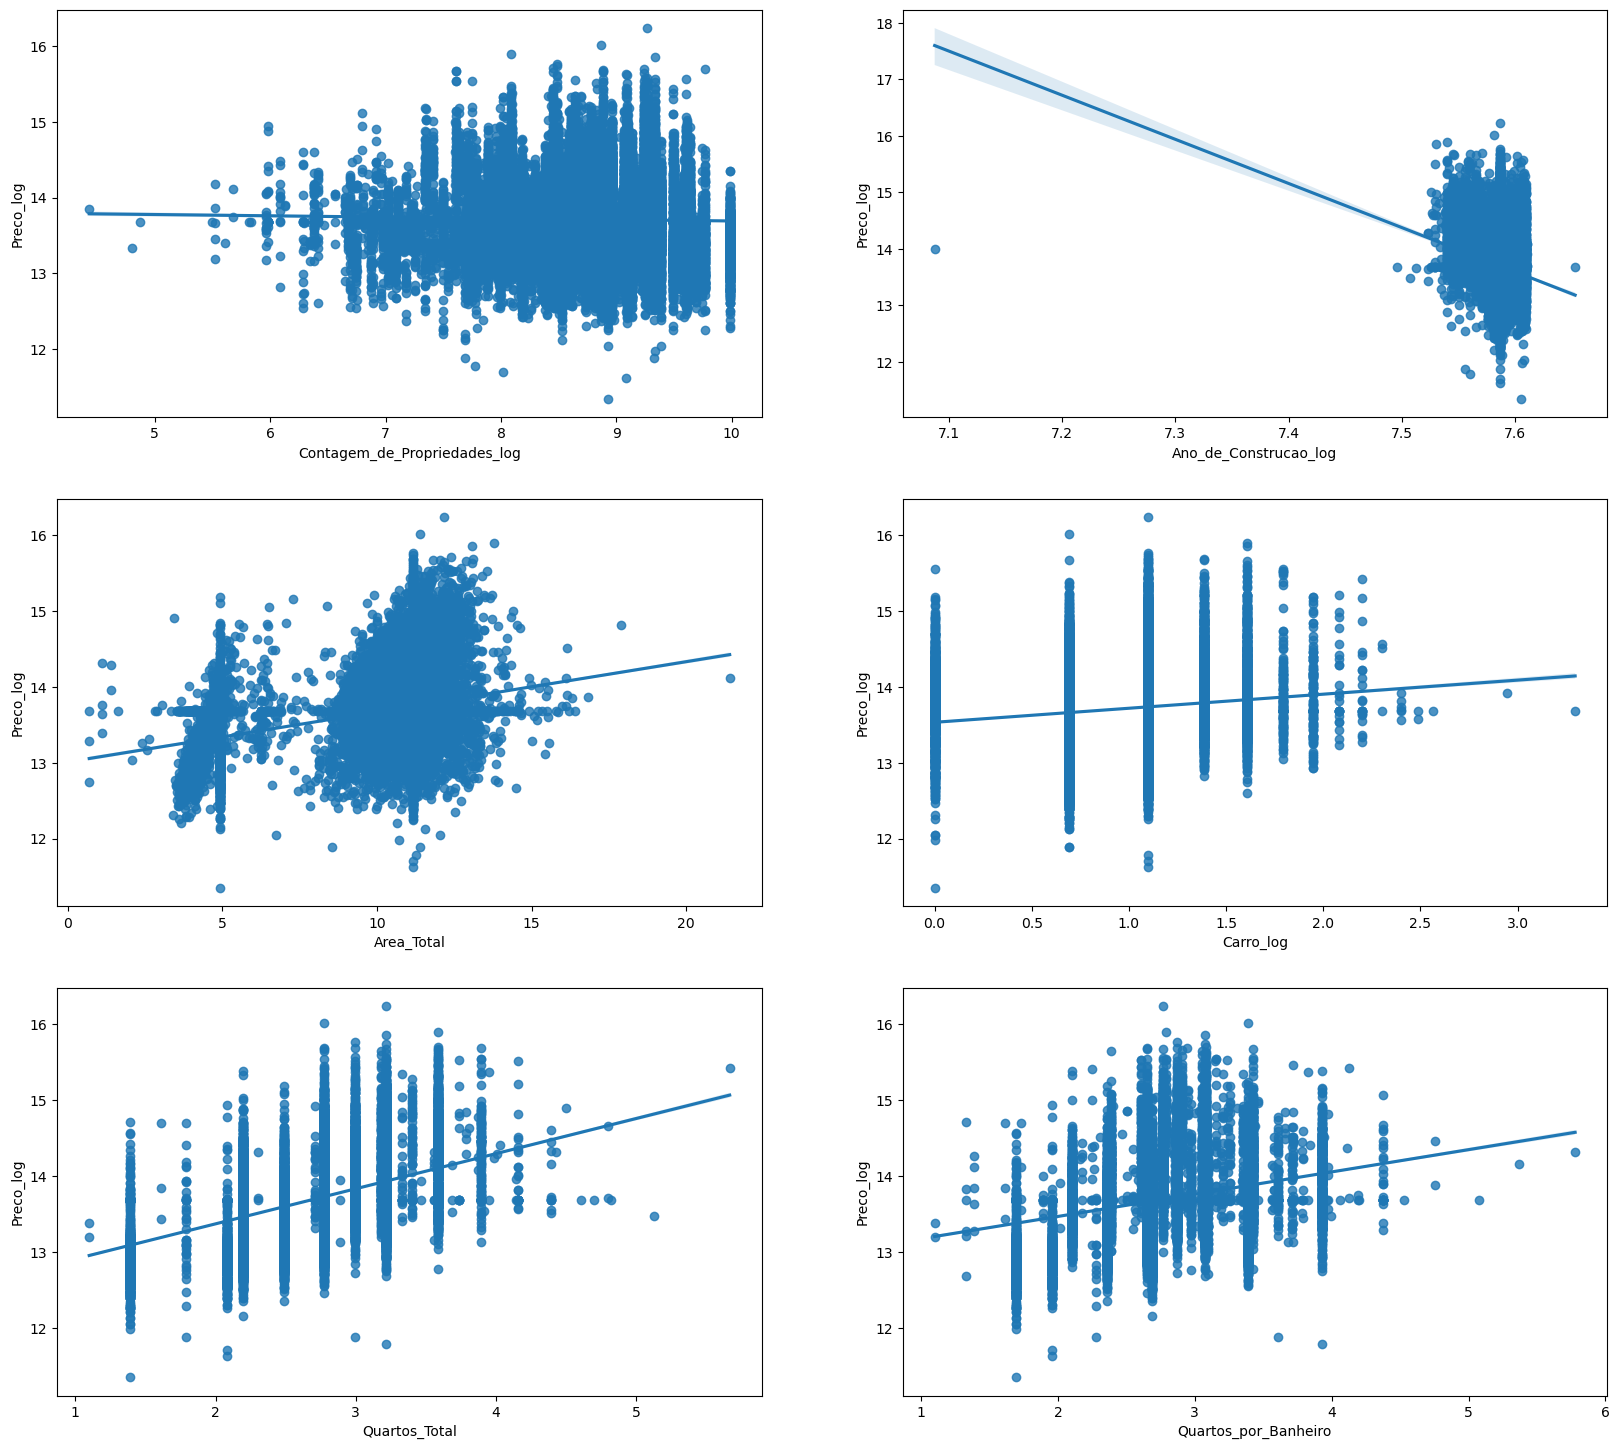

In [74]:
fig, ax = plt.subplots(3,2, figsize=(20,18))

sns.regplot(x=df_fets['Contagem_de_Propriedades_log'],y=df_new_fet['Preco_log'],ax=ax[0,0])
sns.regplot(x=df_fets['Ano_de_Construcao_log'],y=df_new_fet['Preco_log'],ax=ax[0,1])
sns.regplot(x=df_fets['Area_Total'],y=df_new_fet['Preco_log'],ax=ax[1,0])
sns.regplot(x=df_fets['Carro_log'],y=df_new_fet['Preco_log'],ax=ax[1,1])
sns.regplot(x=df_fets['Quartos_Total'],y=df_new_fet['Preco_log'],ax=ax[2,0])
sns.regplot(x=df_fets['Quartos_por_Banheiro'],y=df_new_fet['Preco_log'],ax=ax[2,1])

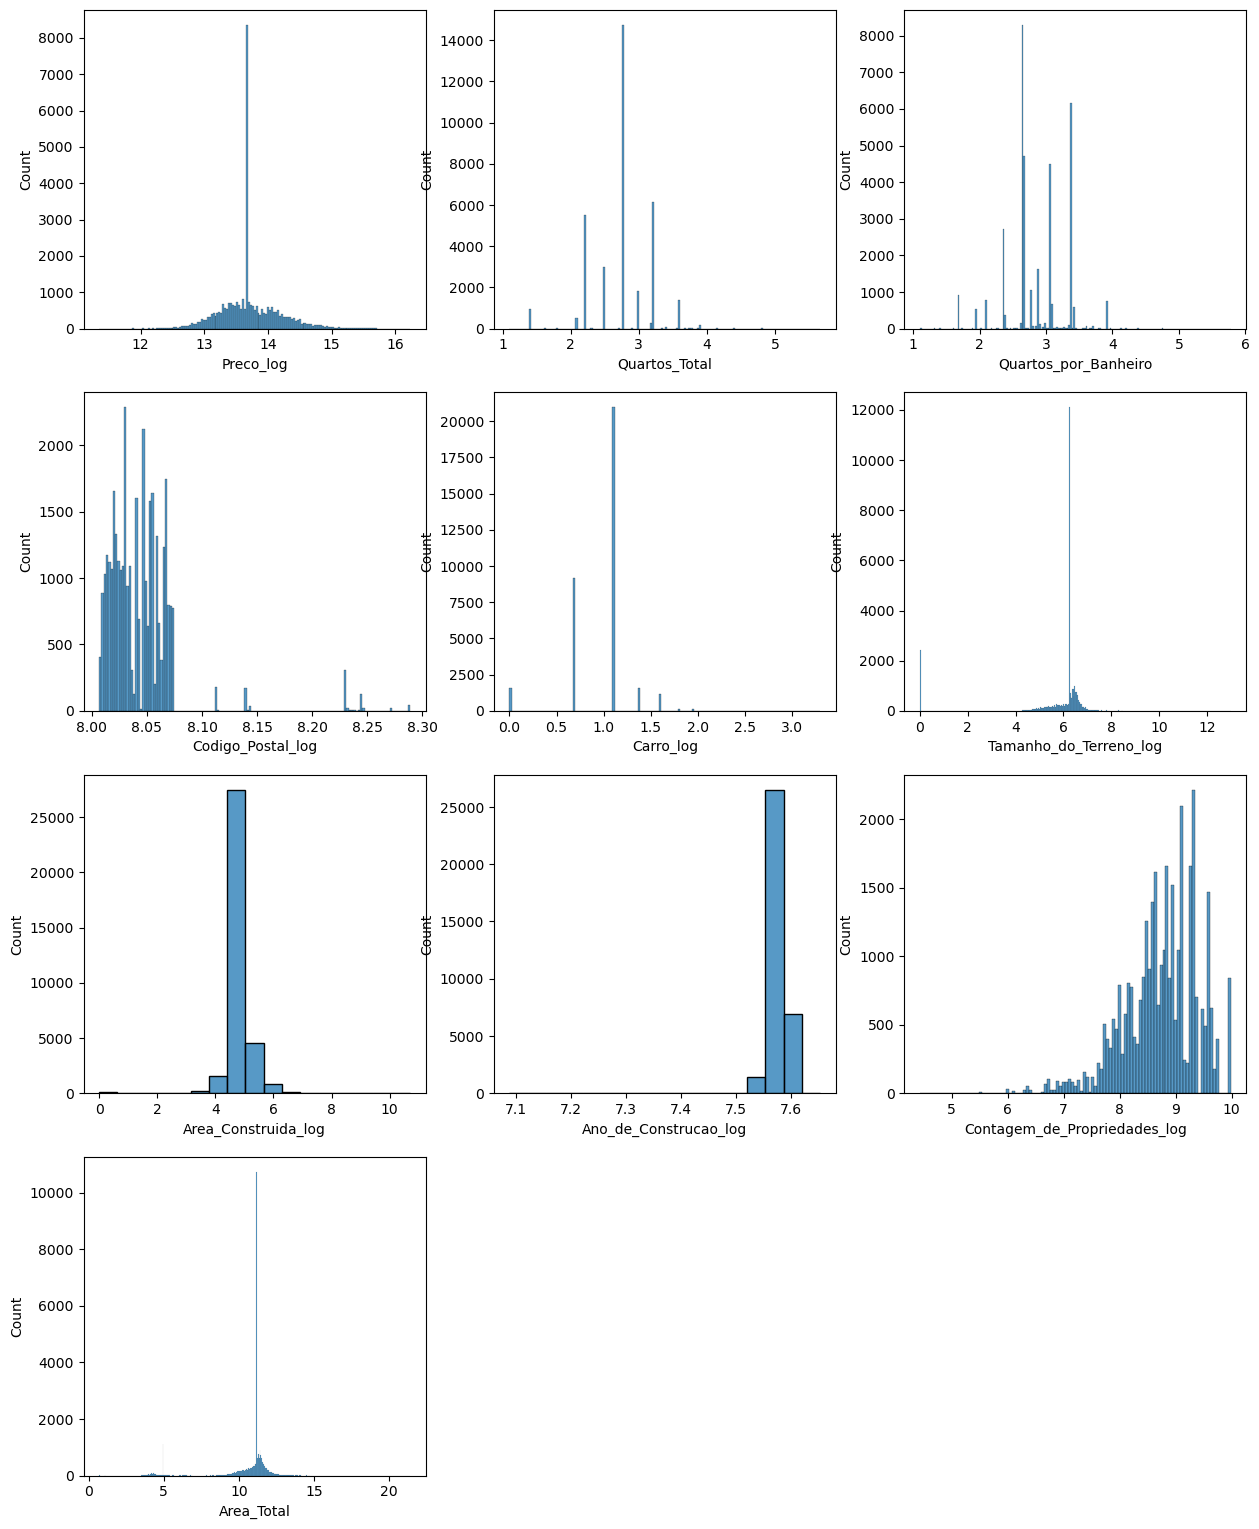

In [75]:
fig = plt.figure(figsize=(15, 24))

for i, column in enumerate(df_fets.columns):
  ax = fig.add_subplot(5, 3, i+1)
  sns.histplot(df_new_fet[column])

In [76]:
df_new_fet = df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Area_Total','Codigo_Postal_log', 'Carro_log', 
                         'Ano_de_Construcao_log', 'Contagem_de_Propriedades_log', 'Tamanho_do_Terreno_log']]

In [77]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_Total                   0.447824
Quartos_por_Banheiro            0.282856
Area_Total                      0.261436
Tamanho_do_Terreno_log          0.223817
Carro_log                       0.130644
Codigo_Postal_log               0.036238
Contagem_de_Propriedades_log   -0.024245
Ano_de_Construcao_log          -0.220500
dtype: float64

#### Com a nova featurea Area_Total tivemos um acréscimo na correlação com a feature Preco, sendo assim tendo uma correlação levemente moderada. Essa feature pode auxiliar na relação entre área construída (edificação) pelo o tamanho do terreno.

In [78]:
# Criando nova feature Tamanho_por_Ano

df_new_fet['Tamanho_por_Ano'] = df_log_final['Tamanho_do_Terreno_log'] / df_log_final['Ano_de_Construcao_log']

In [79]:
df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Area_Total','Codigo_Postal_log', 'Carro_log', 
            'Ano_de_Construcao_log', 'Contagem_de_Propriedades_log', 'Tamanho_do_Terreno_log', 'Tamanho_por_Ano']]

,Preco_log,Quartos_Total,Quartos_por_Banheiro,Area_Total,Codigo_Postal_log,Carro_log,Ano_de_Construcao_log,Contagem_de_Propriedades_log,Tamanho_do_Terreno_log,Tamanho_por_Ano
0,13.676250,2.197225,2.683575,9.764168,8.028781,0.693147,7.586296,8.299037,4.844187,0.638544
1,14.207553,2.197225,2.683575,10.233187,8.028781,0.693147,7.586296,8.299037,5.313206,0.700369
2,13.849913,2.197225,2.683575,9.438272,8.028781,0.000000,7.550135,8.299037,5.056246,0.669689
3,13.676250,2.772589,2.648154,4.919981,8.028781,0.693147,7.586296,8.299037,0.000000,0.000000
4,14.197366,2.772589,2.648154,9.922555,8.028781,0.000000,7.550135,8.299037,4.905275,0.649694
...,...,...,...,...,...,...,...,...,...,...
34852,14.207553,3.218876,3.931366,11.306860,8.011023,1.386294,7.586296,8.786304,6.386879,0.841897
34853,13.696728,2.197225,2.098612,9.249080,8.011023,0.693147,7.610358,8.786304,4.595120,0.603798
34854,13.465955,2.197225,2.683575,10.193953,8.011023,1.098612,7.601402,8.786304,5.398163,0.710154
34855,13.946540,2.772589,2.648154,11.177649,8.011023,1.098612,7.586296,8.786304,6.257668,0.824865


In [80]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_Total                   0.447824
Quartos_por_Banheiro            0.282856
Area_Total                      0.261436
Tamanho_por_Ano                 0.225090
Tamanho_do_Terreno_log          0.223817
Carro_log                       0.130644
Codigo_Postal_log               0.036238
Contagem_de_Propriedades_log   -0.024245
Ano_de_Construcao_log          -0.220500
dtype: float64

#### Nesta feature o ganho na produção foi bem aquém, mas a coluna trás ao usuário insignts sobre a relação entre metragem do terreno e o ano de construção do imóvel.

In [81]:
# Propriedades_por_Area que é a razão entre a contagem de propriedades e a área total. Esses novos atributos 
# podem ser úteis para entender melhor a relação entre a contagem de propriedades e outros atributos

In [82]:
# Criando nova feature Propriedades_por_Area

df_new_fet['Propriedades_por_Area'] = df_new_fet['Contagem_de_Propriedades_log'] / df_new_fet['Area_Total']

In [83]:
df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Area_Total', 'Carro_log', 'Tamanho_por_Ano','Propriedades_por_Area']]

,Preco_log,Quartos_Total,Quartos_por_Banheiro,Area_Total,Carro_log,Tamanho_por_Ano,Propriedades_por_Area
0,13.676250,2.197225,2.683575,9.764168,0.693147,0.638544,0.849948
1,14.207553,2.197225,2.683575,10.233187,0.693147,0.700369,0.810992
2,13.849913,2.197225,2.683575,9.438272,0.000000,0.669689,0.879296
3,13.676250,2.772589,2.648154,4.919981,0.693147,0.000000,1.686803
4,14.197366,2.772589,2.648154,9.922555,0.000000,0.649694,0.836381
...,...,...,...,...,...,...,...
34852,14.207553,3.218876,3.931366,11.306860,1.386294,0.841897,0.777077
34853,13.696728,2.197225,2.098612,9.249080,0.693147,0.603798,0.949965
34854,13.465955,2.197225,2.683575,10.193953,1.098612,0.710154,0.861913
34855,13.946540,2.772589,2.648154,11.177649,1.098612,0.824865,0.786060


In [84]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_Total                   0.447824
Quartos_por_Banheiro            0.282856
Area_Total                      0.261436
Tamanho_por_Ano                 0.225090
Tamanho_do_Terreno_log          0.223817
Carro_log                       0.130644
Codigo_Postal_log               0.036238
Contagem_de_Propriedades_log   -0.024245
Ano_de_Construcao_log          -0.220500
Propriedades_por_Area          -0.222410
dtype: float64

#### Essa feature aumentou a correlação fraca em relação a variável de interesse. Dessa forma, não será utilizada!

In [85]:
# Codigo_Postal_por_Area que é a razão entre o código postal e a área total.

In [86]:
# Criando novas features

df_new_fet['Postal_por_Area'] = df_new_fet['Codigo_Postal_log'] / df_new_fet['Area_Total']

In [87]:
df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Area_Total', 'Carro_log', 'Tamanho_por_Ano', 'Postal_por_Area']]

,Preco_log,Quartos_Total,Quartos_por_Banheiro,Area_Total,Carro_log,Tamanho_por_Ano,Postal_por_Area
0,13.676250,2.197225,2.683575,9.764168,0.693147,0.638544,0.822270
1,14.207553,2.197225,2.683575,10.233187,0.693147,0.700369,0.784583
2,13.849913,2.197225,2.683575,9.438272,0.000000,0.669689,0.850662
3,13.676250,2.772589,2.648154,4.919981,0.693147,0.000000,1.631872
4,14.197366,2.772589,2.648154,9.922555,0.000000,0.649694,0.809145
...,...,...,...,...,...,...,...
34852,14.207553,3.218876,3.931366,11.306860,1.386294,0.841897,0.708510
34853,13.696728,2.197225,2.098612,9.249080,0.693147,0.603798,0.866143
34854,13.465955,2.197225,2.683575,10.193953,1.098612,0.710154,0.785860
34855,13.946540,2.772589,2.648154,11.177649,1.098612,0.824865,0.716700


In [88]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log                       1.000000
Quartos_Total                   0.447824
Quartos_por_Banheiro            0.282856
Area_Total                      0.261436
Tamanho_por_Ano                 0.225090
Tamanho_do_Terreno_log          0.223817
Carro_log                       0.130644
Codigo_Postal_log               0.036238
Contagem_de_Propriedades_log   -0.024245
Ano_de_Construcao_log          -0.220500
Propriedades_por_Area          -0.222410
Postal_por_Area                -0.226116
dtype: float64

#### A nova feature apresentou um resultado bem abaixo do esperado, dessa forma também não será utilizada.

In [89]:
df_new_fet = df_new_fet[['Preco_log', 'Quartos_Total', 'Quartos_por_Banheiro', 'Area_Total', 'Carro_log', 'Tamanho_por_Ano']]

In [90]:
df_new_fet.corrwith((df_new_fet['Preco_log'])).sort_values(ascending=False).head(50)

Preco_log               1.000000
Quartos_Total           0.447824
Quartos_por_Banheiro    0.282856
Area_Total              0.261436
Tamanho_por_Ano         0.225090
Carro_log               0.130644
dtype: float64

#### Por fim, essas serão as variáveis numéricas utilizadas posteriormente para a construção de modelos de ML!

## *Correlação para váriáveis categóricas*

In [91]:
# dataset apenas com varíaveis do tipo categóricas;

df_cat_categoricas = df_copia.select_dtypes('object')

In [92]:
df_cat_categoricas.head()

,Suburbio,Endereco,Tipo,Metodo,Vendedor,Data,Area_do_Conselho,Nome_da_Regiao
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan


In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [94]:
# regra para codificar variáveis categóricas
# caso tenha mais que 3 tipos -> label encoding
# Caso contrário -> OHE

labels = []
one_hot_encod = []
x = []
le = LabelEncoder()

#contando categorias de cada feature
# se > 3, guardar em labels
# caso contrário, guardar em one_hot_encod
for coluna in df_cat_categoricas.columns:
  if len(df_cat_categoricas[coluna].value_counts()) > 3:
    labels.append(coluna)
  else:
    one_hot_encod.append(coluna)

df_cat_categoricas_labels = df_cat_categoricas[labels].apply(le.fit_transform) # codifica usando labelencoder
df_cat_categoricas_ohe = pd.get_dummies(df_cat_categoricas[one_hot_encod], drop_first=True) # codifica usando one hot encoder (get dummies)

# unindo tudo em um único DF
df_cat_categoricas_codificadas = pd.concat([df_cat_categoricas_labels, df_cat_categoricas_ohe], axis = 1)

In [95]:
df_cat_categoricas_codificadas

,Suburbio,Endereco,Metodo,Vendedor,Data,Area_do_Conselho,Nome_da_Regiao,Tipo_t,Tipo_u
0,0,29458,6,155,58,31,2,0,0
1,0,32512,2,33,60,31,2,0,0
2,0,15389,2,33,63,31,2,0,0
3,0,9768,7,296,63,31,2,0,1
4,0,25128,5,33,64,31,2,0,0
...,...,...,...,...,...,...,...,...,...
34852,348,5862,0,152,38,16,6,0,0
34853,348,16982,5,321,38,16,6,0,0
34854,348,7350,2,152,38,16,6,1,0
34855,348,5421,5,370,38,16,6,0,0


In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df_cat_categoricas_codificadas[:]
# format all fields as string
X = X.astype(str)

y = df.iloc[:,-1]

# usando a classe SelectKBest com a função chi2
# para saber o valor de chi2 de cada feature
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(df_cat_categoricas_codificadas, y)
df_cat_categoricas_codificadas_fs = fs.transform(X)

In [97]:
df_cat_categoricas_codificadas_fs

array([['0', '29458', '6', ..., '2', '0', '0'],
       ['0', '32512', '2', ..., '2', '0', '0'],
       ['0', '15389', '2', ..., '2', '0', '0'],
       ...,
       ['348', '7350', '2', ..., '6', '1', '0'],
       ['348', '5421', '5', ..., '6', '0', '0'],
       ['348', '17743', '0', ..., '6', '0', '0']], dtype=object)

Feature Suburbio 0: 2003723.3448310387
Feature Endereco 1: 3068137.124963483
Feature Metodo 2: 1200.191801403237
Feature Vendedor 3: 249645.1797858216
Feature Data 4: 4478.778157726111
Feature Area_do_Conselho 5: 247033.33562604213
Feature Nome_da_Regiao 6: 39763.17351600811
Feature Tipo_t 7: 1806.8807504612687
Feature Tipo_u 8: 5045.858206135364


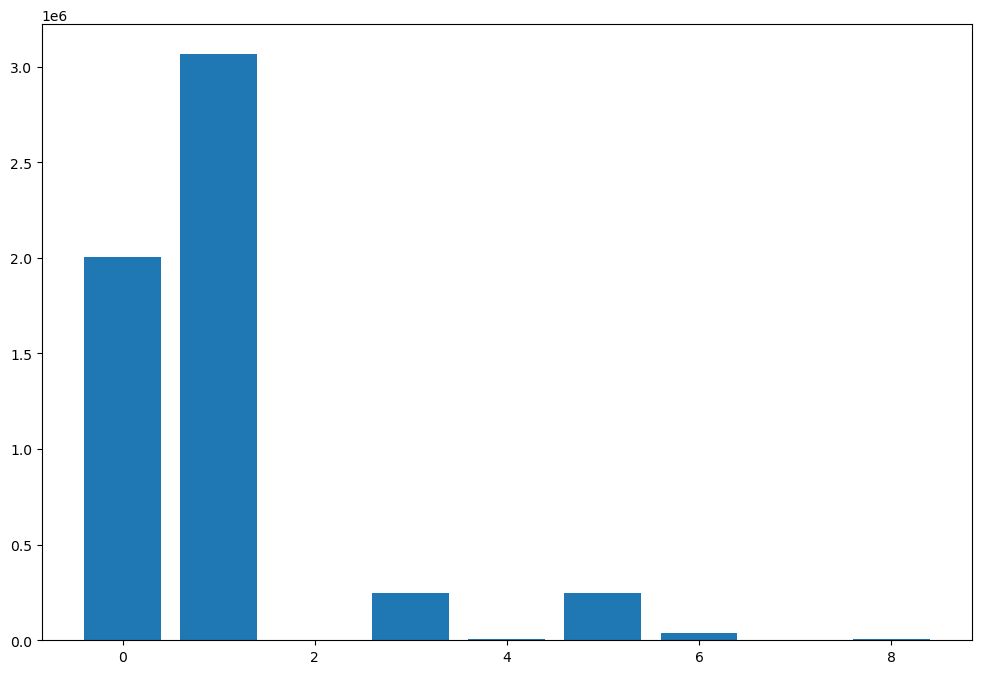

In [98]:
# 
for i in range(len(fs.scores_)):
	print('Feature {} {}: {}' .format(df_cat_categoricas_codificadas.columns[i], i, fs.scores_[i]))


plt.figure(figsize = (12, 8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Conclusões

#### O dataframe apresentou inconsistência sobre os dados faltantes. Dessa forma, foi necessário realizar um tratamento de dados. Para as variáveis numericas foram inseridos nos dados faltantes as suas respectivas medianas e para as variáveis categóricas as suas modas;

#### A variável de interesse Preco apresenta assimetria a direita;

#### A variável de interesse Preco expôs outliers. Assim foram retirados como também de outras variáveis para normalização dos dados;

#### Foi aplicado uma transformação logarítmica, sendo que a nossa base de dados tem uma distribuição assimétrica e ao aplicar o logaritmo a essas variáveis, podemos tornar sua distribuição mais simétrica e estabilizar sua variância, o que pode melhorar a precisão do modelo estatístico.

#### Com a engenharia de atributos conseguimos selecionar 4 novas features que apresentam uma correlação menor em comparação as correlações iniciais sem os devidos tratamentos;

#### Após a engenheria de atributos e aplicação da transformação logaritmica foi constatado valores tenham se tornado NaN ou infinitos devido a presença de valores negativos ou zero no conjunto de dados. Para correção foram retirados esses valores.

#### Quanto maior a quantidade de quartos e banheiros, maior será o preço do imóvel;

#### De acordo com a avaliação do método chi2 para as variáveis qualitativas, as features Suburbio e Endereco são as mais significativas em relação a variável de interesse Preco;